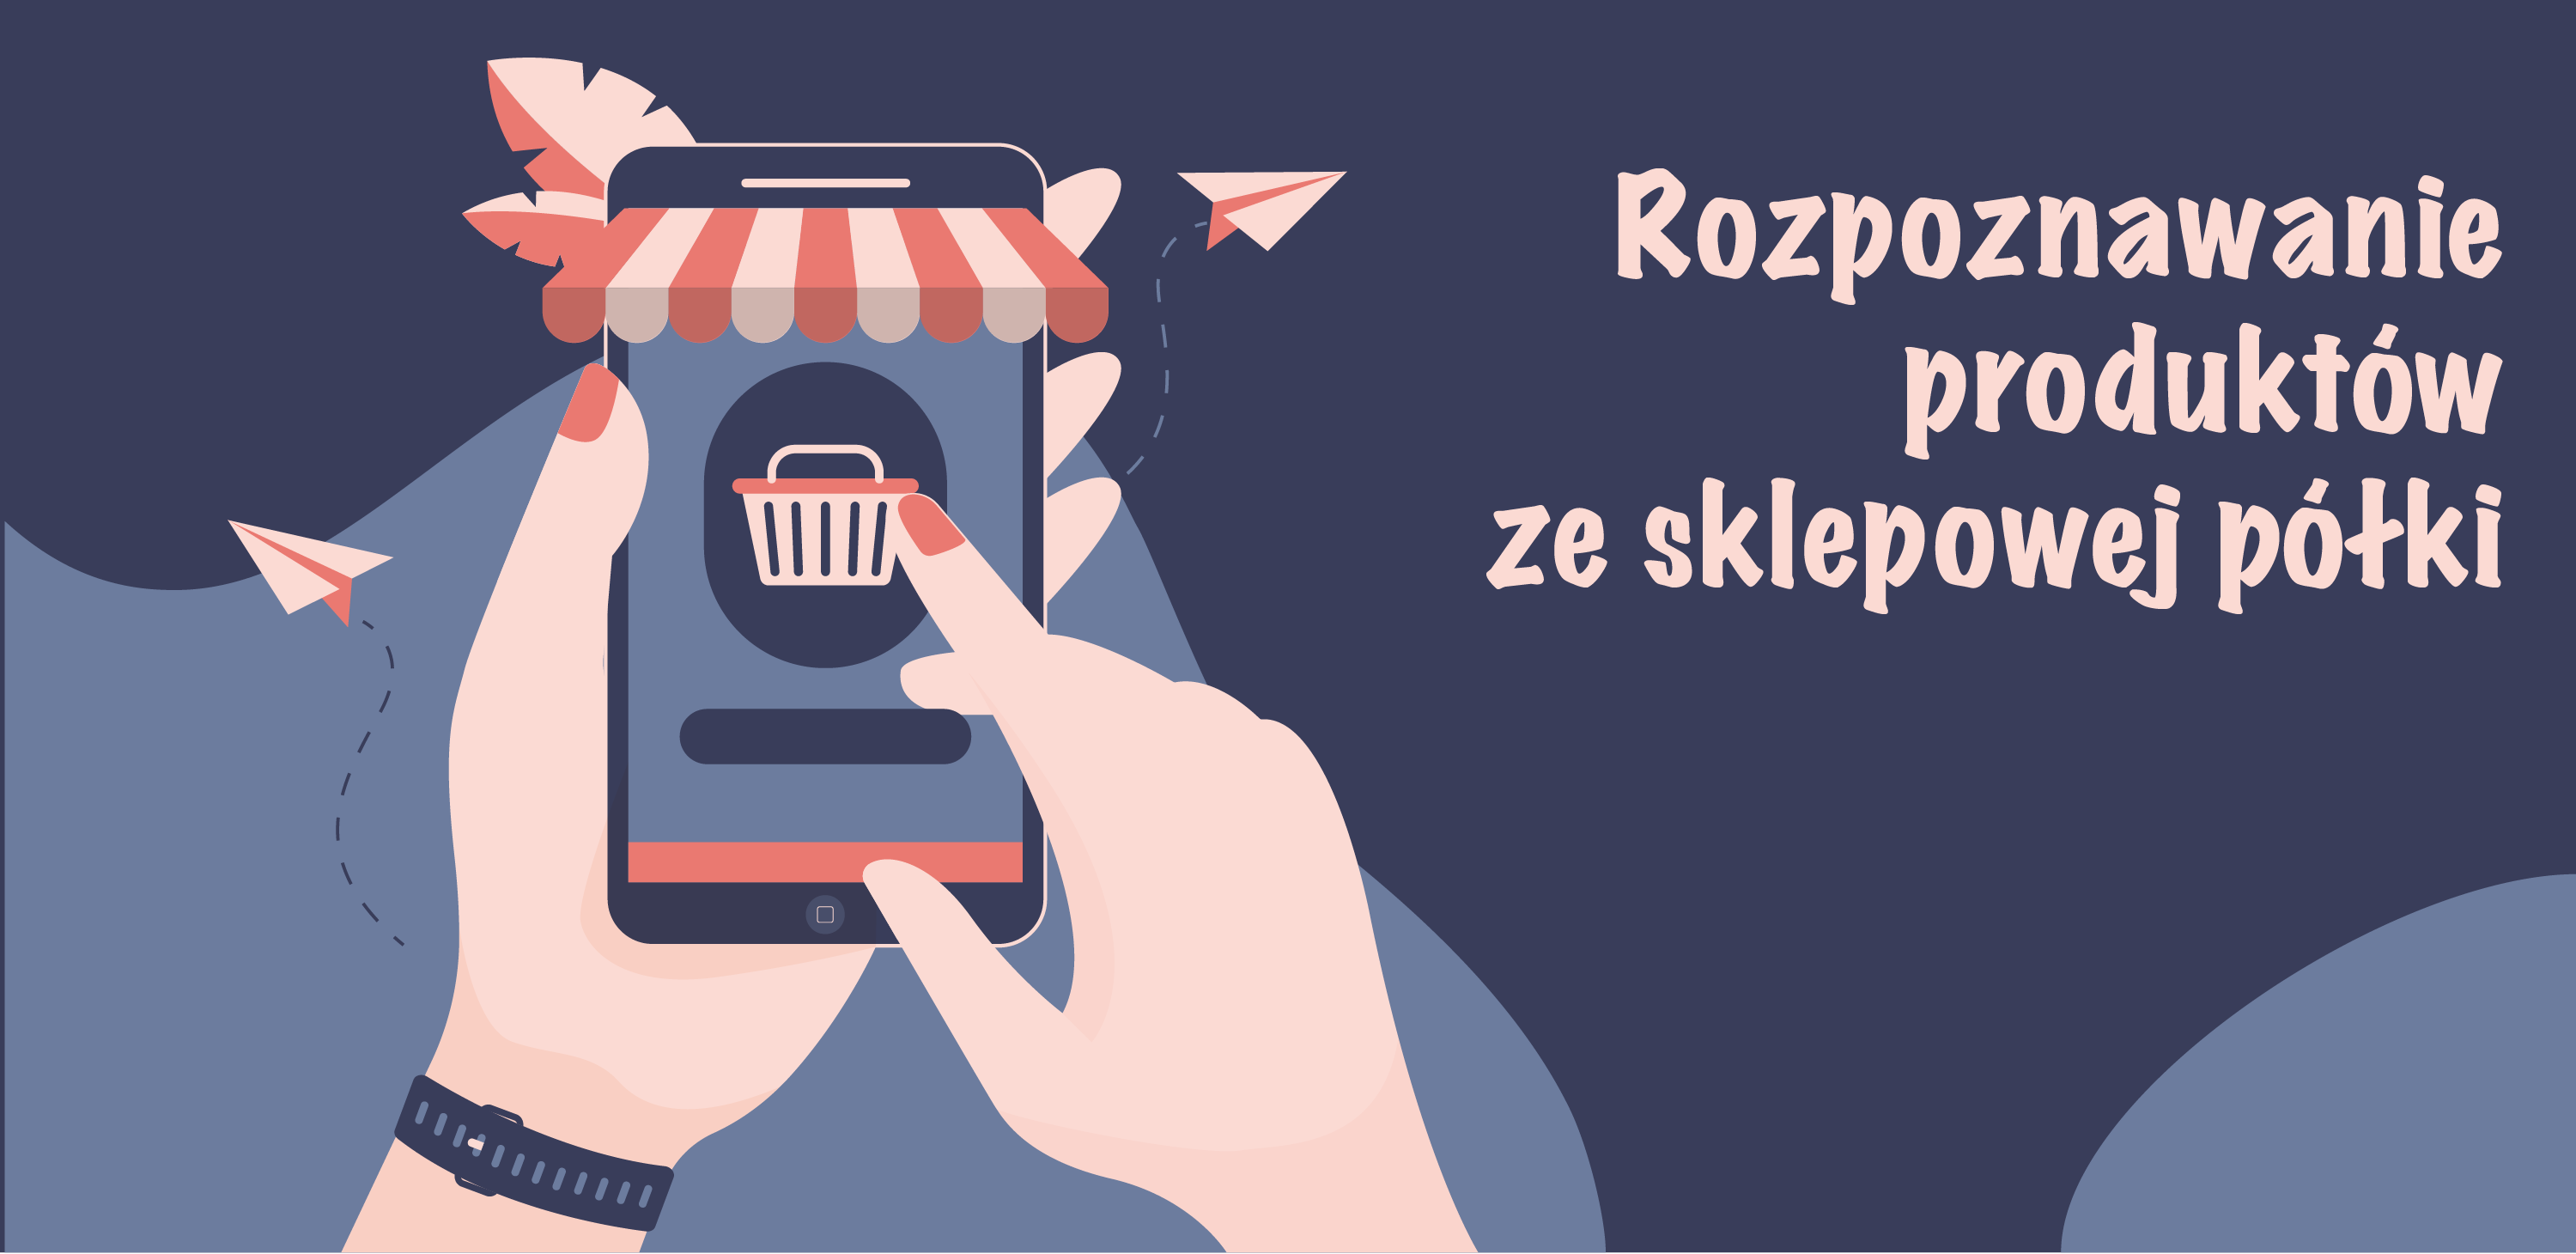

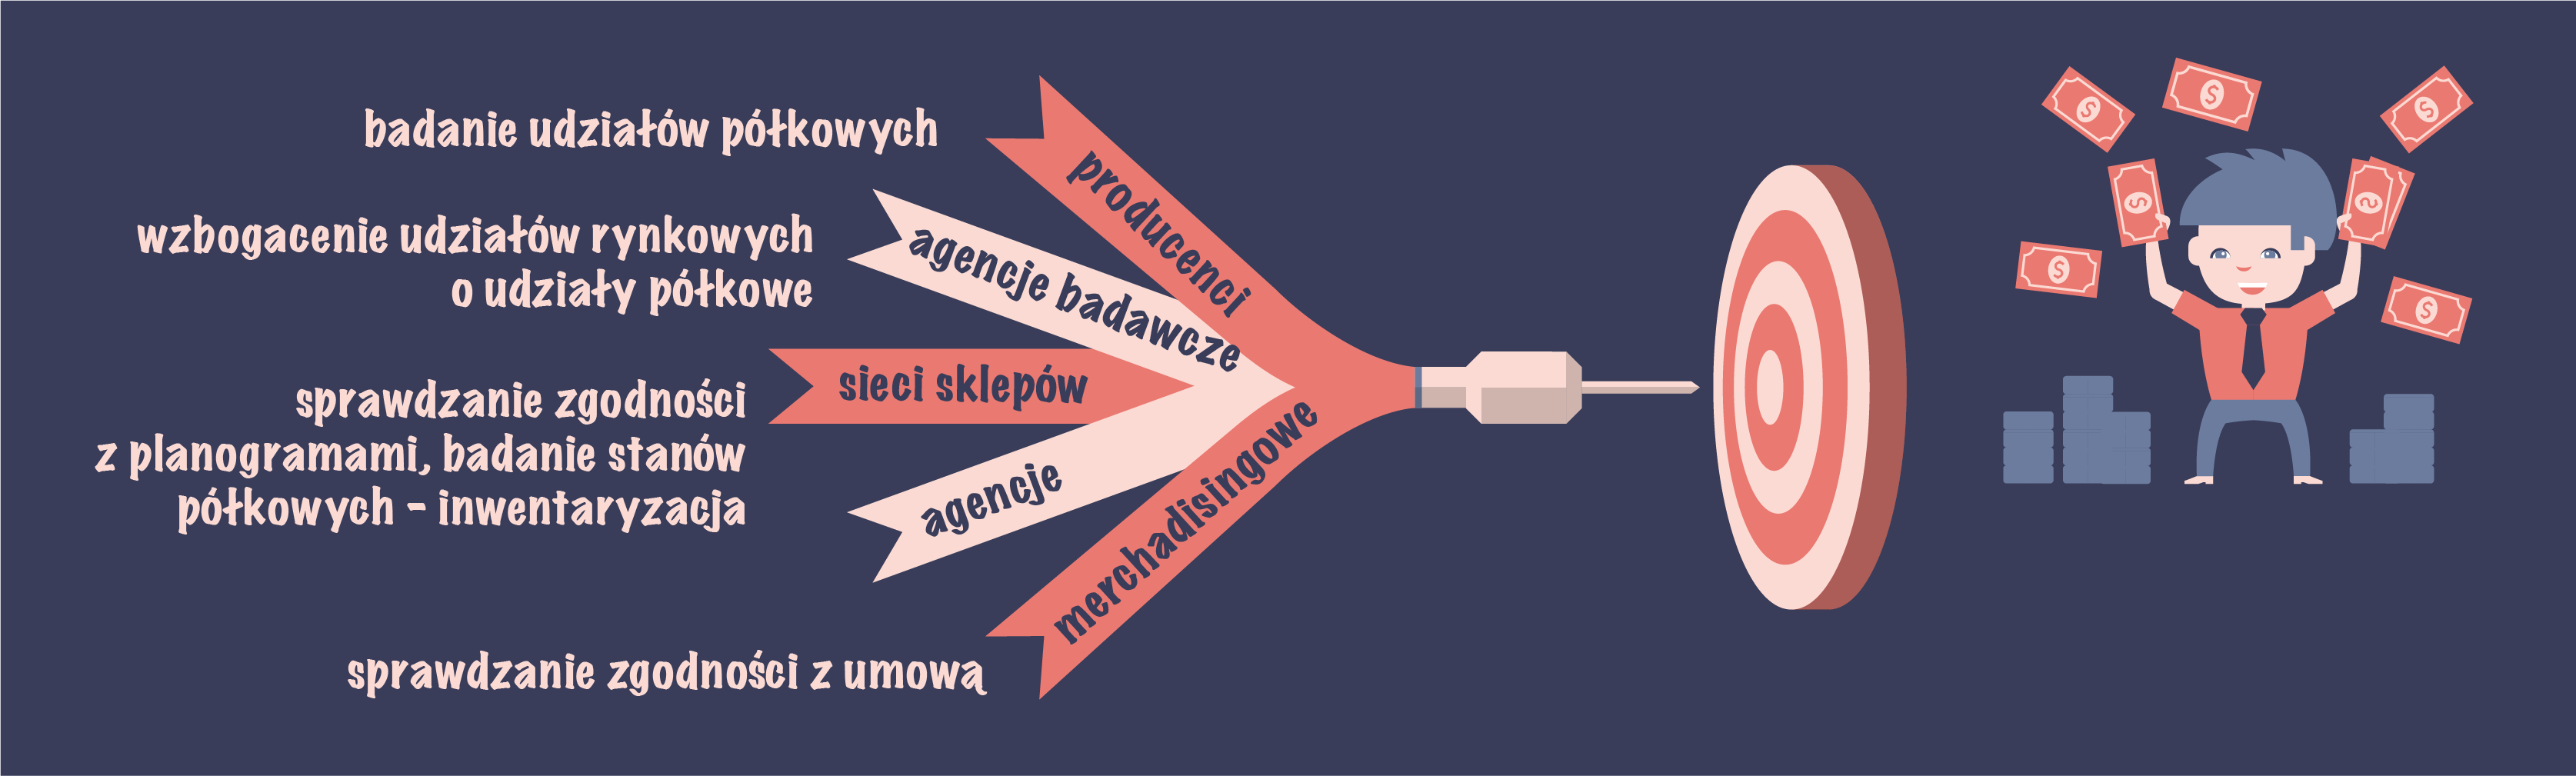

In [ ]:
# podłączenie do dysku google
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import model_from_json
import numpy as np
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import pandas as pd
import seaborn as sns
import sys
import cv2
import cv2 as cv
import os

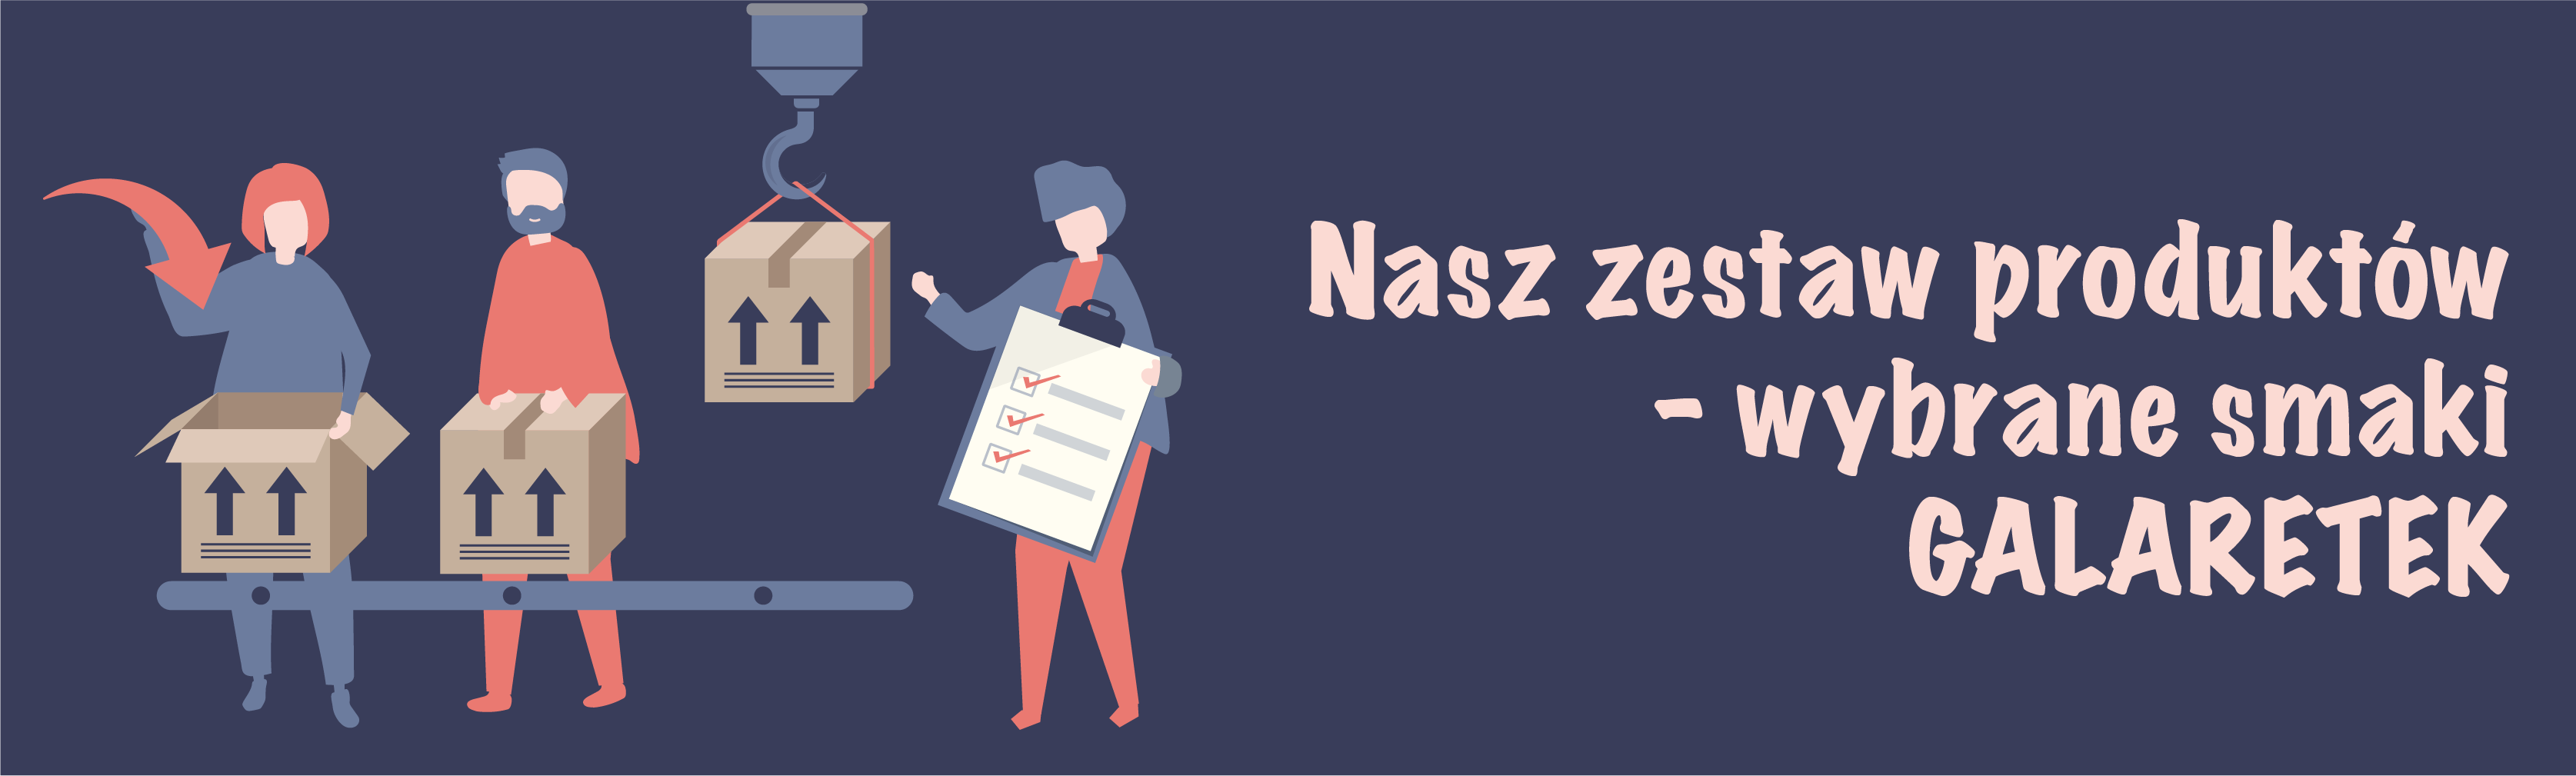

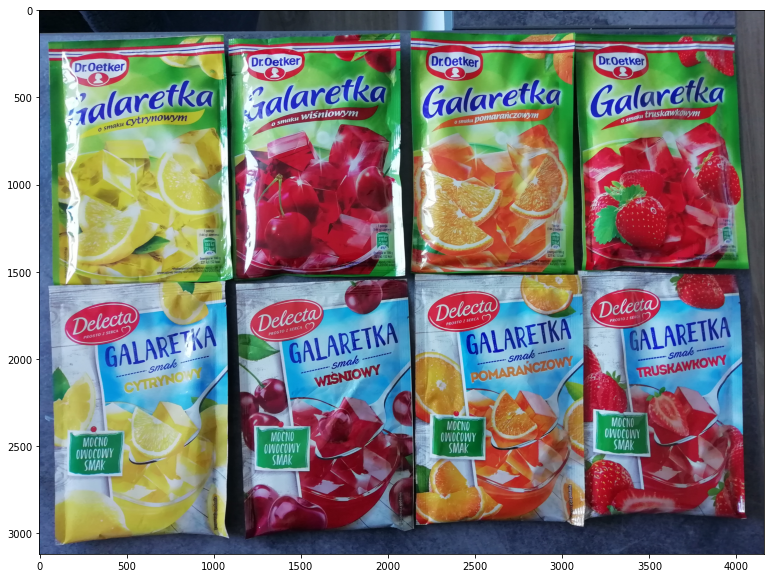

In [ ]:
img_path = str(r'/content/drive/My Drive/projekt_DL/półka/galaretki_polka_6.jpg')
img = cv2.imread(img_path, 0)
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.figure(figsize = (45,10))
plt.imshow(img)  # pokaż zdjęcie

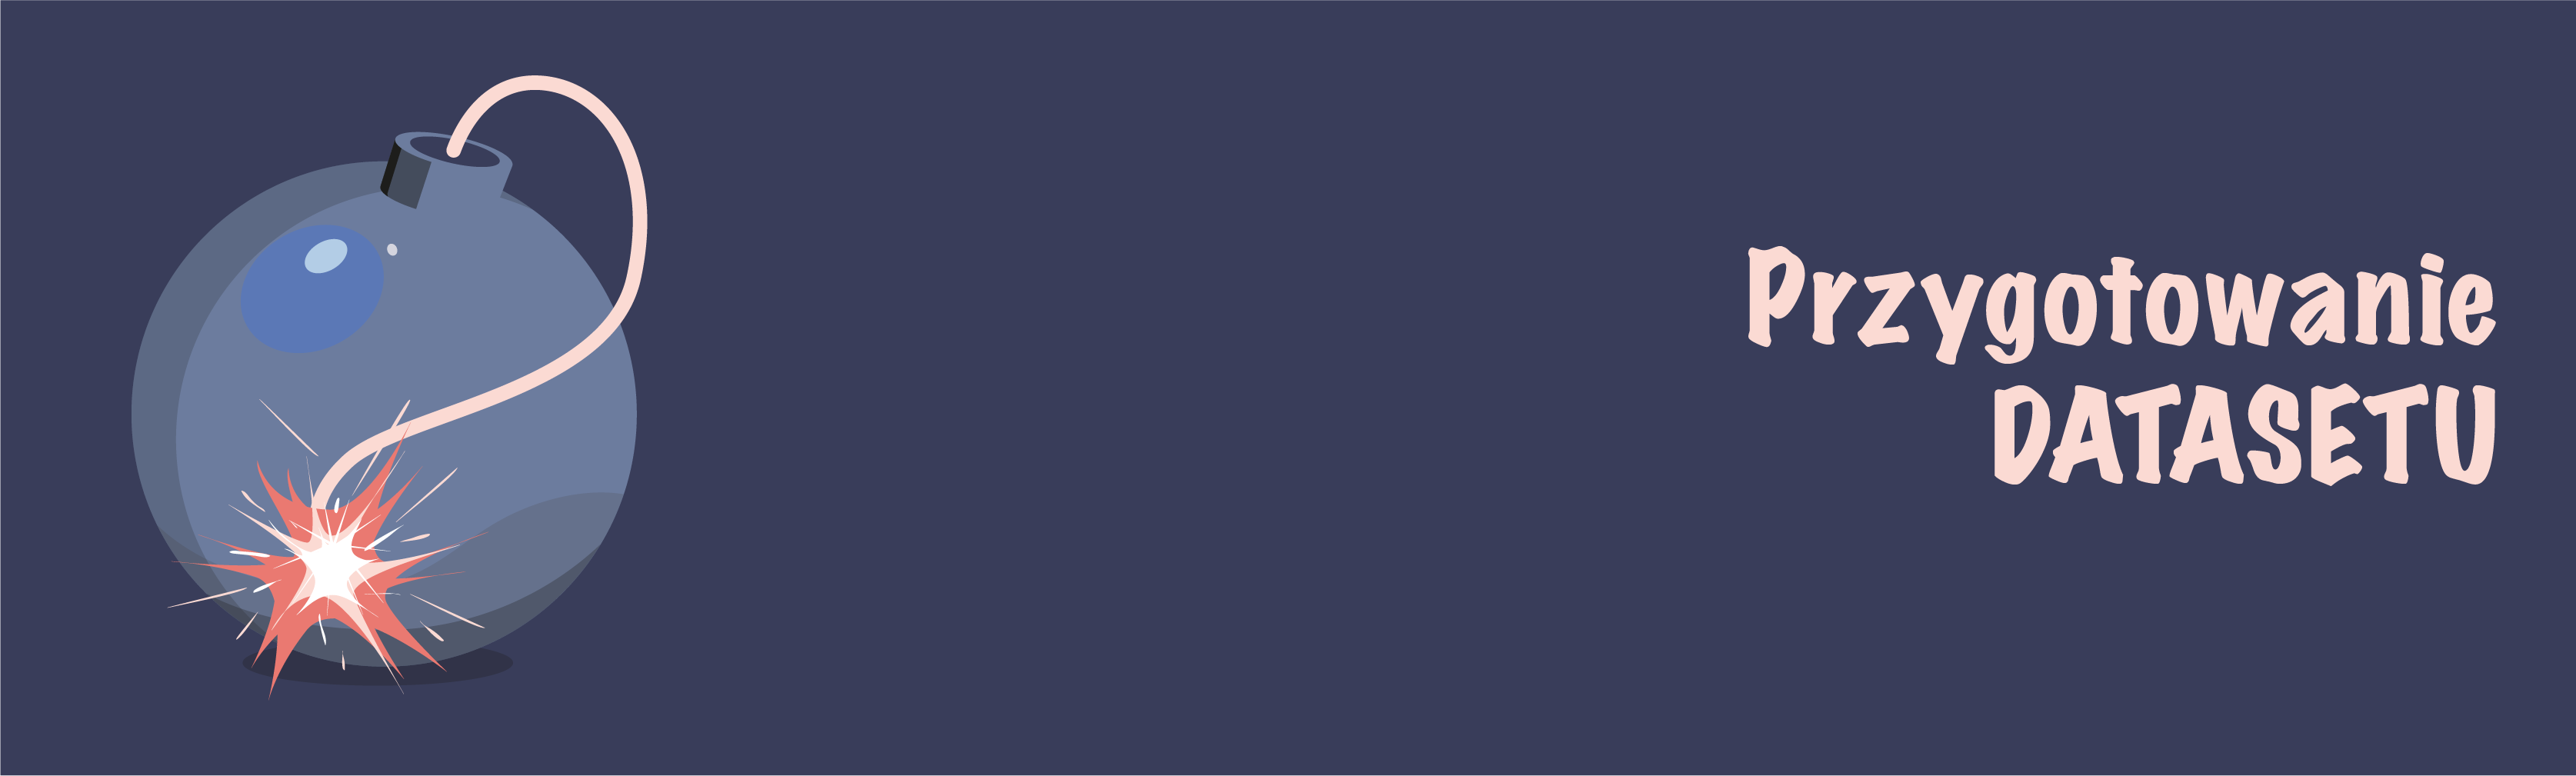

## dodanie różnych szumów do zdjęć

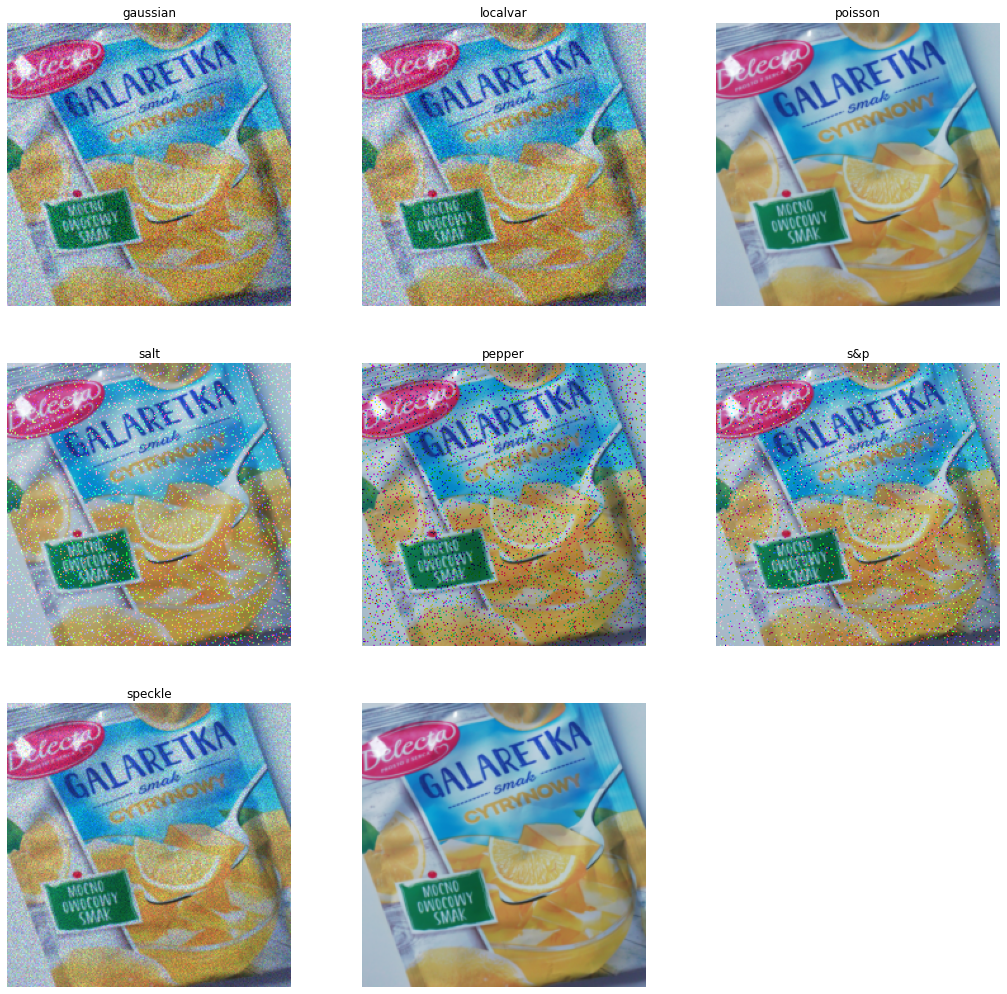

In [ ]:
import skimage
from skimage import io
from skimage.transform import resize
import matplotlib.pyplot as plt

img_path='/content/drive/My Drive/projekt_DL/galaretka_orig/spreparowane/Galaretka cytrynowa Delecta/IMG_20200720_170312_BURST001_COVER.jpg'
img = io.imread(img_path)
img_resized = resize(img, (224, 224), anti_aliasing=True)

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=3
plotnoise(img_resized, "gaussian", r,c,1)
plotnoise(img_resized, "localvar", r,c,2)
plotnoise(img_resized, "poisson", r,c,3)
plotnoise(img_resized, "salt", r,c,4)
plotnoise(img_resized, "pepper", r,c,5)
plotnoise(img_resized, "s&p", r,c,6)
plotnoise(img_resized, "speckle", r,c,7)
plotnoise(img_resized, None, r,c,8)
plt.show()

## Obrót zdjęć pod różnym kątem

Zdjęcie oryginalne vs obrócone o różne kąty


(-0.5, 223.5, 223.5, -0.5)

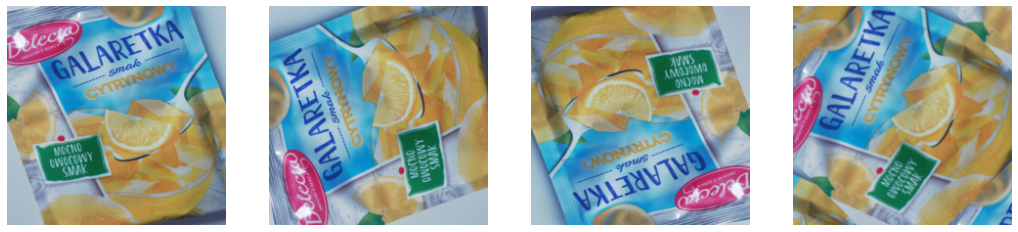

In [ ]:
from skimage.transform import rotate
img_path = '/content/drive/My Drive/projekt_DL/galaretka_orig/spreparowane/Galaretka cytrynowa Delecta/IMG_20200720_170312_BURST001_COVER.jpg'
img = io.imread(img_path)

fig = plt.figure(figsize=(18,24))
print('Zdjęcie oryginalne vs obrócone o różne kąty')

ax1 = fig.add_subplot(4,4,1)
img_resized = resize(img, (224, 224), anti_aliasing=True)
ax1.imshow(img_resized)
plt.axis("off")

ax2 = fig.add_subplot(4,4,2)
img_changed = rotate(img_resized, angle=90, mode = 'wrap')
ax2.imshow(img_changed)
plt.axis("off")

ax3 = fig.add_subplot(4,4,3)
img_changed = rotate(img_resized, angle=180, mode = 'wrap')
ax3.imshow(img_changed)
plt.axis("off")

ax4 = fig.add_subplot(4,4,4)
img_changed = rotate(img_resized, angle=45, mode = 'wrap')
ax4.imshow(img_changed)
plt.axis("off")

## Przesięcia zdjęć o różne ilości pixeli

Zdjęcie oryginalne vs zdjęcia przesunięte o różne ilości pixeli


(-0.5, 223.5, 223.5, -0.5)

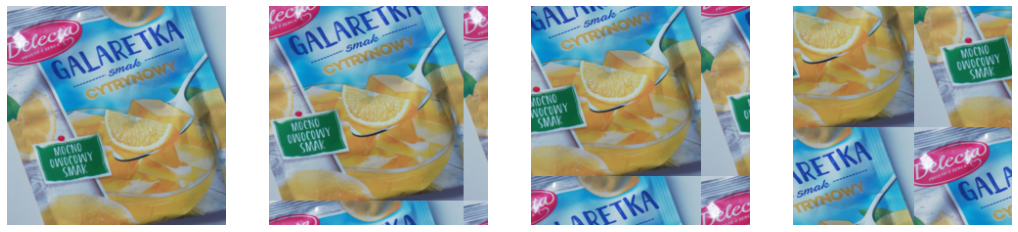

In [ ]:
from skimage.transform import AffineTransform, warp
fig = plt.figure(figsize=(18,24))
print('Zdjęcie oryginalne vs zdjęcia przesunięte o różne ilości pixeli')

ax1 = fig.add_subplot(4,4,1)
img_resized = resize(img, (224, 224), anti_aliasing=True)
ax1.imshow(img_resized)
plt.axis("off")

ax2 = fig.add_subplot(4,4,2)
transform = AffineTransform(translation=(25,25))
img_changed = warp(img_resized,transform,mode='wrap')
ax2.imshow(img_changed)
plt.axis("off")

ax3 = fig.add_subplot(4,4,3)
transform = AffineTransform(translation=(50,50))
img_changed = warp(img_resized,transform,mode='wrap')
ax3.imshow(img_changed)
plt.axis("off")

ax4 = fig.add_subplot(4,4,4)
transform = AffineTransform(translation=(100,100))
img_changed = warp(img_resized,transform,mode='wrap')
ax4.imshow(img_changed)
plt.axis("off")

## Odbicia lutrzane zdjęcia w pionie i poziomie

Zdjęcie oryginalne vs odbicie lustrzane lewo-prawo oraz góra dół i oba połączone


(-0.5, 223.5, 223.5, -0.5)

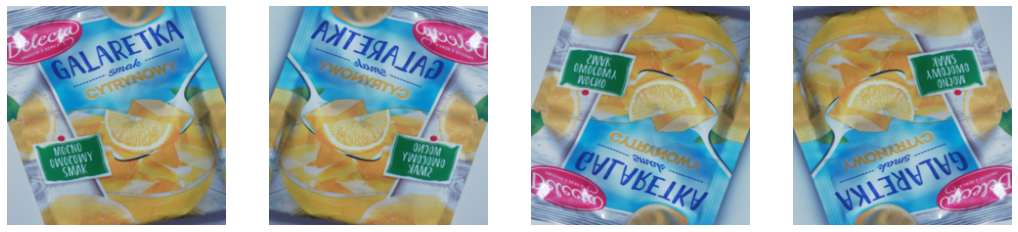

In [ ]:
import numpy as np
fig = plt.figure(figsize=(18,24))
print('Zdjęcie oryginalne vs odbicie lustrzane lewo-prawo oraz góra dół i oba połączone')

ax1 = fig.add_subplot(4,4,1)
img_resized = resize(img, (224, 224), anti_aliasing=True)
ax1.imshow(img_resized)
plt.axis("off")

ax2 = fig.add_subplot(4,4,2)
img_changed = np.fliplr(img_resized)
ax2.imshow(img_changed)
plt.axis("off")

ax3 = fig.add_subplot(4,4,3)
img_changed = np.flipud(img_resized)
ax3.imshow(img_changed)
plt.axis("off")

ax4 = fig.add_subplot(4,4,4)
img_changed = np.flipud(np.fliplr(img_resized))
ax4.imshow(img_changed)
plt.axis("off")

# Ilość zdjęć


In [ ]:
folder = ['Galaretka cytrynowa Delecta',
 'Galaretka cytrynowa DrOetker',
 'Galaretka pomarańczowa Delecta',
 'Galaretka pomarańczowa DrOetker',
 'Galaretka truskawkowa Delecta',
 'Galaretka truskawkowa DrOetker',
 'Galaretka wiśniowa Delecta',
 'Galaretka wiśniowa DrOetker'] 

print('Ilość zdjęć: \n')

for fol in folder:
  img_folder_path_trening = f'/content/drive/My Drive/projekt_DL/galaretka_set_3/spreparowane/{fol}/'
  img_folder_path_test = f'/content/drive/My Drive/projekt_DL/galaretka_set_3/sklepowe/{fol}/'
  dirListing_trening = os.listdir(img_folder_path_trening)
  dirListing_test = os.listdir(img_folder_path_test)
  print(f'{fol} -> trening: {len(dirListing_trening)}, test: {len(dirListing_test)}')

Ilość zdjęć: 

Galaretka cytrynowa Delecta -> trening: 1000, test: 199
Galaretka cytrynowa DrOetker -> trening: 1000, test: 200
Galaretka pomarańczowa Delecta -> trening: 1000, test: 200
Galaretka pomarańczowa DrOetker -> trening: 1000, test: 200
Galaretka truskawkowa Delecta -> trening: 1000, test: 200
Galaretka truskawkowa DrOetker -> trening: 1000, test: 200
Galaretka wiśniowa Delecta -> trening: 1000, test: 200
Galaretka wiśniowa DrOetker -> trening: 1000, test: 200


######UWAGA - nie zastosowaliśmy kasycznego podziału na zbiór treningowy i walidacyjny

Zdjęcia spreparowane zawierają dużą ilość "trudnych" zdjęć:
- ektremalne kąty pochylenia produktu do przodu i do tyłu
- ekstremlane kąty wykonania zjdęcia prawo-lewo
- niedoświetlenie
- refleksy świetlne
- oświetlenie pod różnymi kątami
- różne rodzaje oświeltenia oraz typ (ciepły, zimny)
- dodatkowe elementy na zdjęciach (inne produkty, karton, półka, cenówka)
- "ZEPSUCIE" na wszelkie możliwe sposoby (o czy było wyżej). 

Zdjęcia sklepowe są bliższe praktyce, żeby sprawdzić czy nie przesadziliśmy z psuciem zdjęć, co miało miejsce przy podejsciu 1.0 ;)

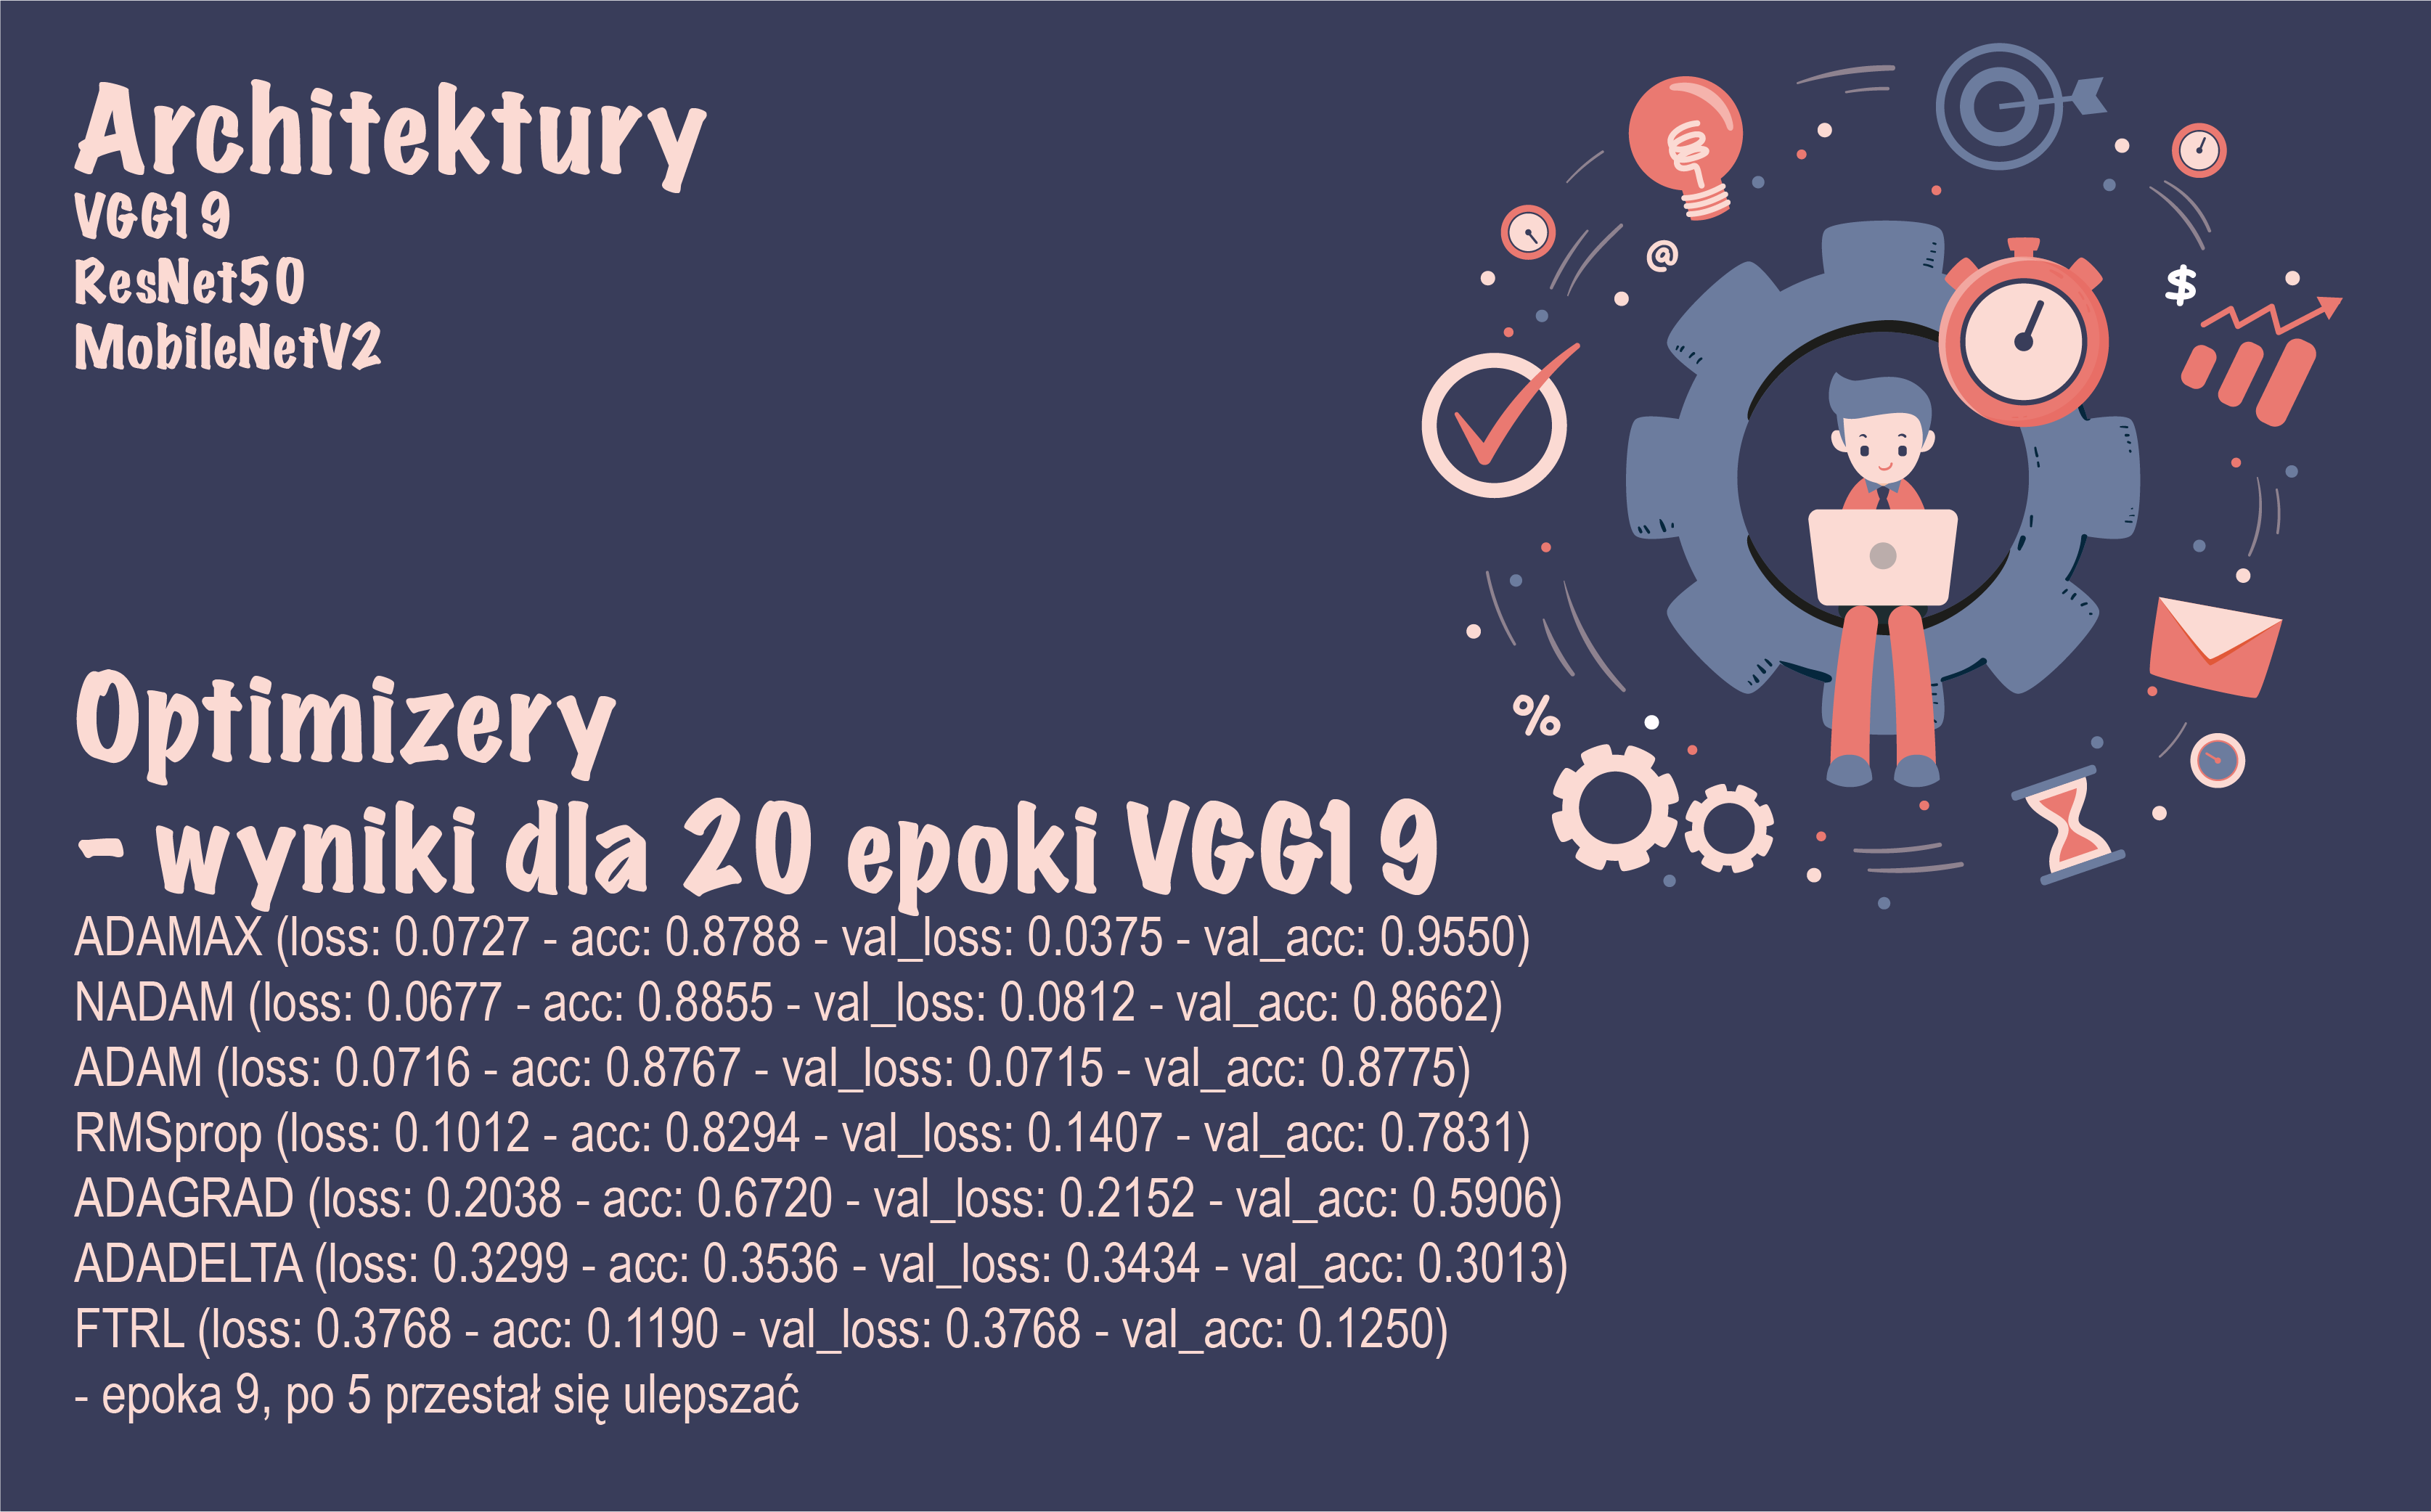

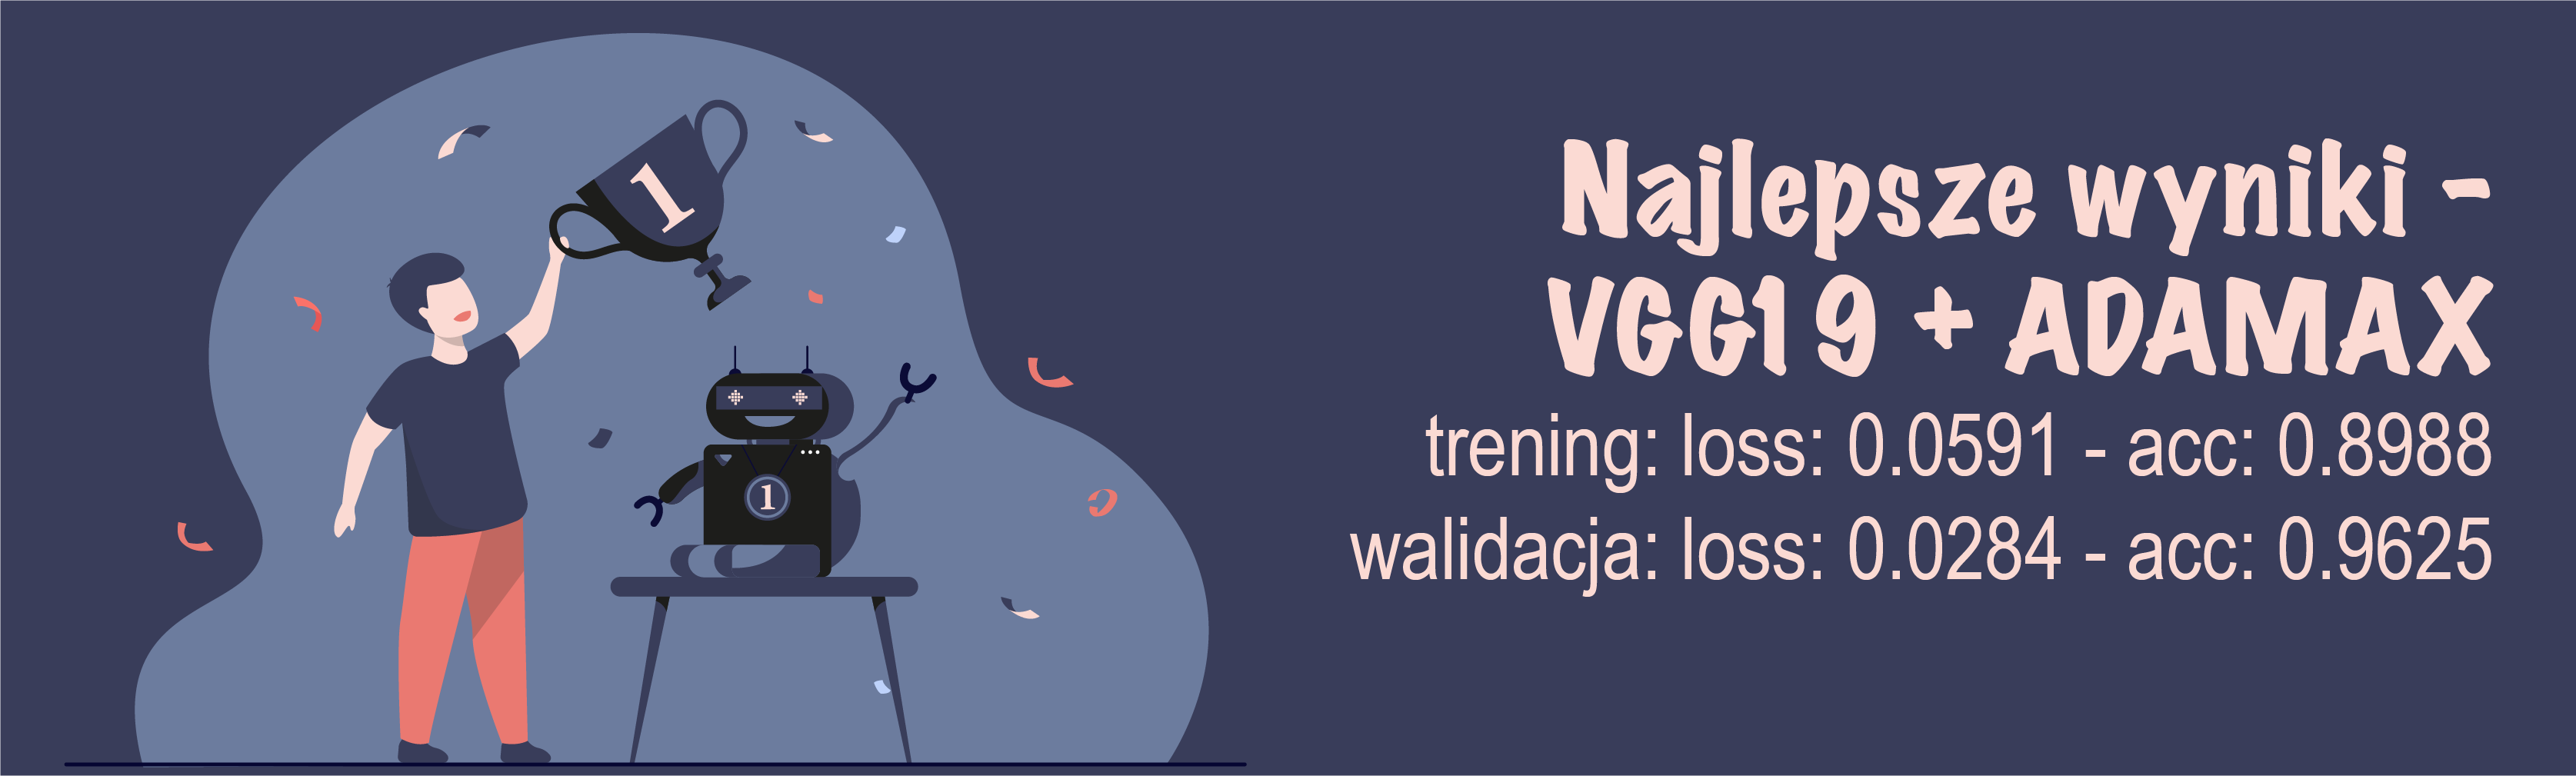

In [ ]:
X_test, y_test = next(test_set)
print('Ilość zdjęć', len(X_test))
y_pred = loaded_model.predict(X_test)

loaded_model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adamax(lr=lr), metrics=['acc'])
loss, acc = loaded_model.evaluate(X_test, y_test, verbose=2)
print(f'ZAŁADOWANY MODEL -> test loss: {round(loss*100, 2)}%, test accuracy: {round(acc*100, 2)}%')

Ilość zdjęć 32
1/1 - 0s - loss: 0.0337 - acc: 0.9688
ZAŁADOWANY MODEL -> test loss: 3.37%, test accuracy: 96.88%


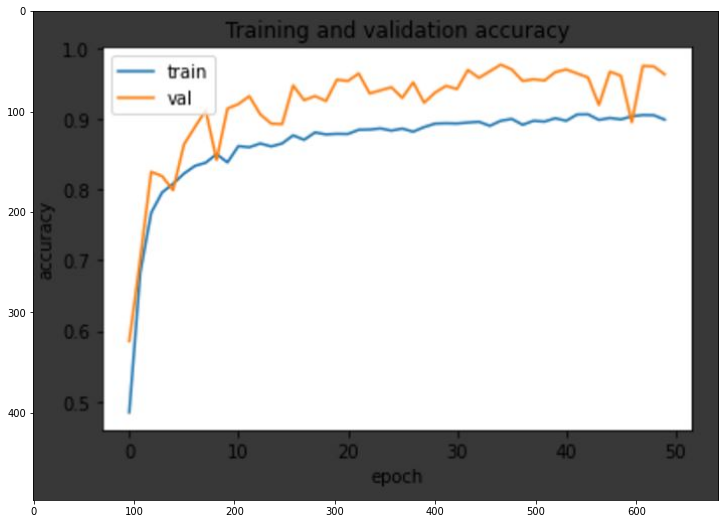

In [ ]:
img_path = str(r'/content/drive/My Drive/projekt_DL/colab notebooks/training_and_validation_accuracy.jpg')
img = cv2.imread(img_path, 0)
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.figure(figsize = (45,9))
plt.imshow(img)

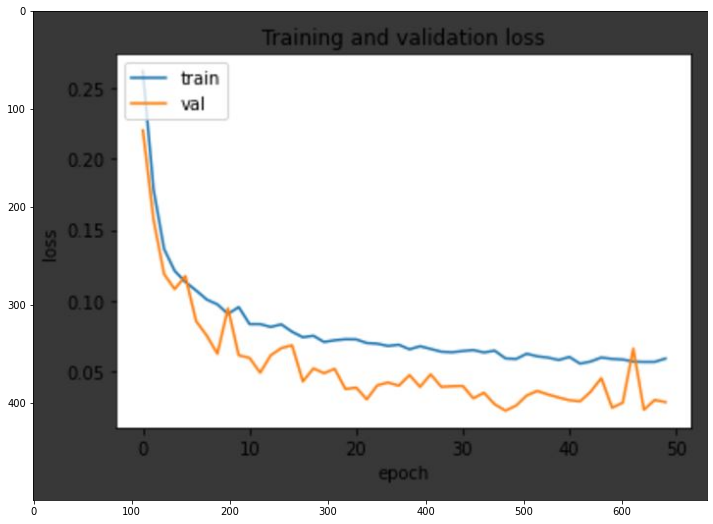

In [ ]:
img_path = str(r'/content/drive/My Drive/projekt_DL/colab notebooks/training and validation loss.JPG')
img = cv2.imread(img_path, 0)
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.figure(figsize = (45,9))
plt.imshow(img)

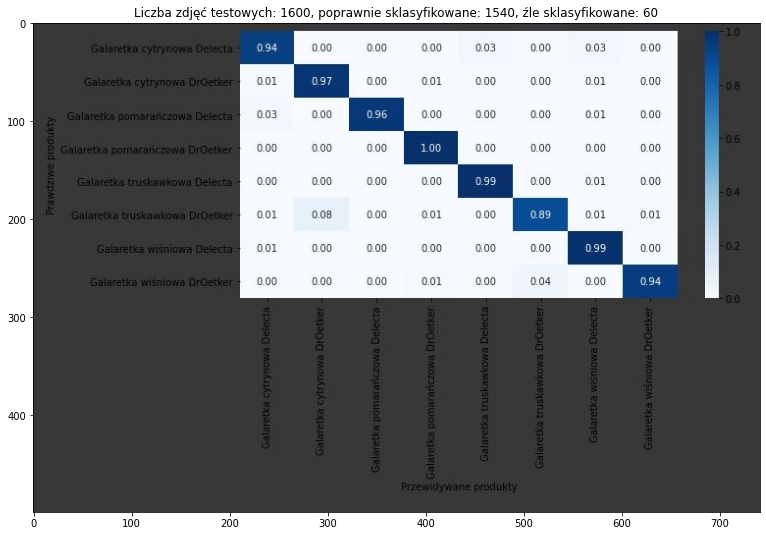

In [ ]:
img_path = str(r'/content/drive/My Drive/projekt_DL/colab notebooks/confusion_matrix_2.JPG')
img = cv2.imread(img_path, 0)
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.figure(figsize = (45,9))
plt.title('Liczba zdjęć testowych: 1600, poprawnie sklasyfikowane: 1540, źle sklasyfikowane: 60')
plt.imshow(img)

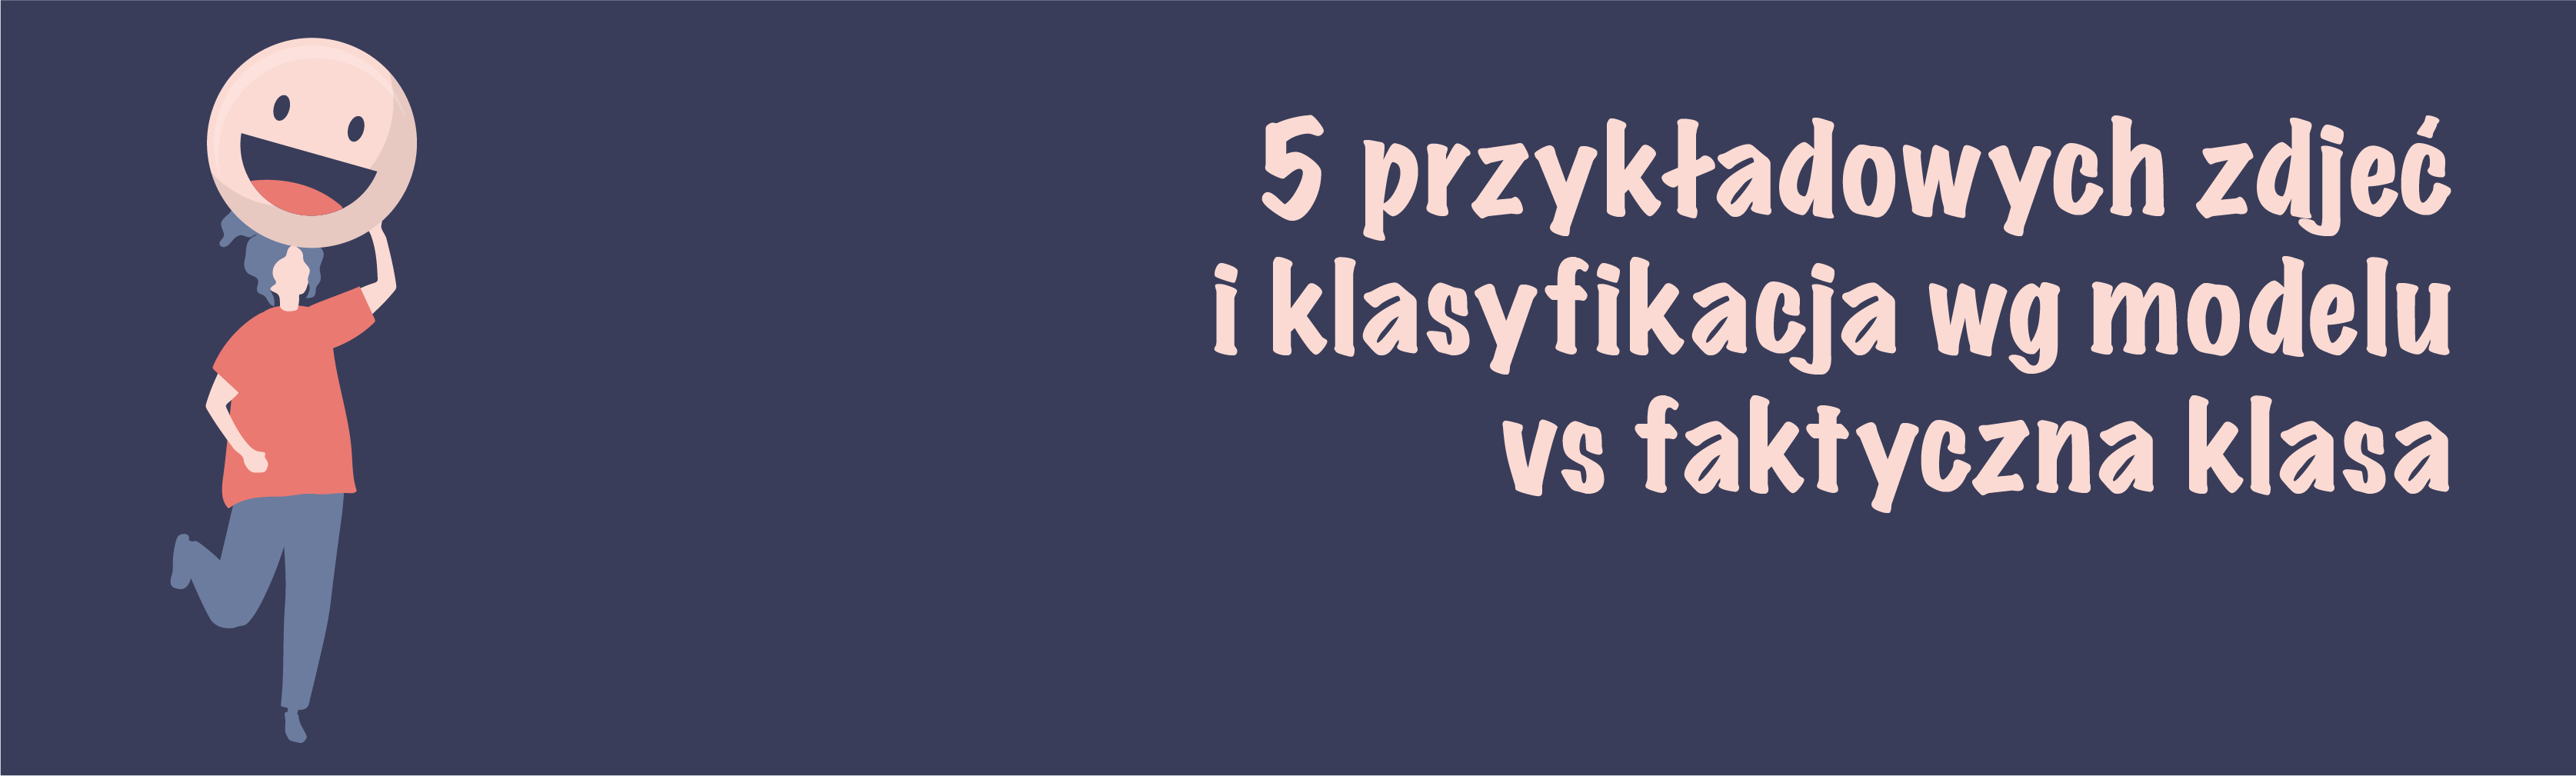

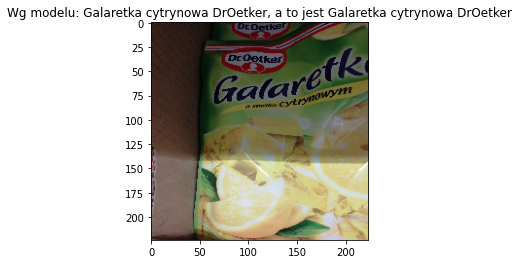

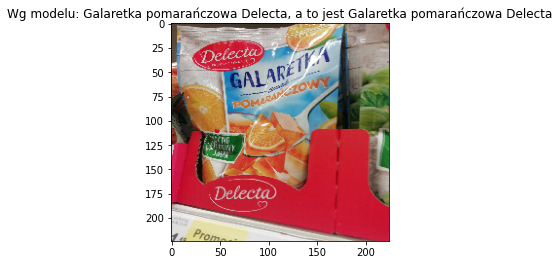

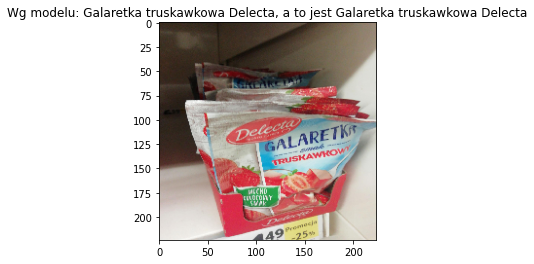

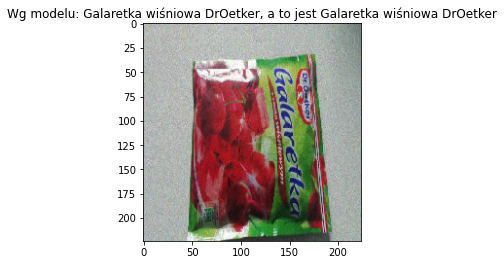

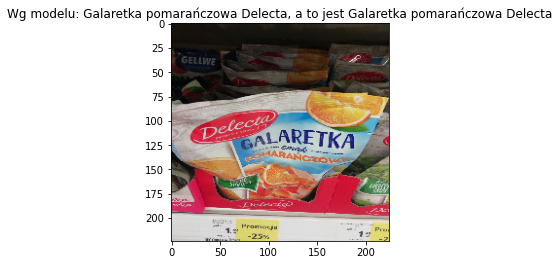

In [ ]:
# przykładowych 5 zdjeć i klasyfikacja wg modelu vs faktyczna klasa
y_pred_example = np.argmax(loaded_model.predict(X_test), axis=-1)

for i, yp in enumerate(y_pred_example[0:5]):
  #print(labels[i])
  #print(labels[yp])
  #print(y_test[i])
  #print(np.argmax(y_test[i]))
  plt.imshow(np.squeeze(X_test[i]))
  plt.title(f'Wg modelu: {labels[yp]}, a to jest {labels[np.argmax(y_test[i])]}')
  plt.show()

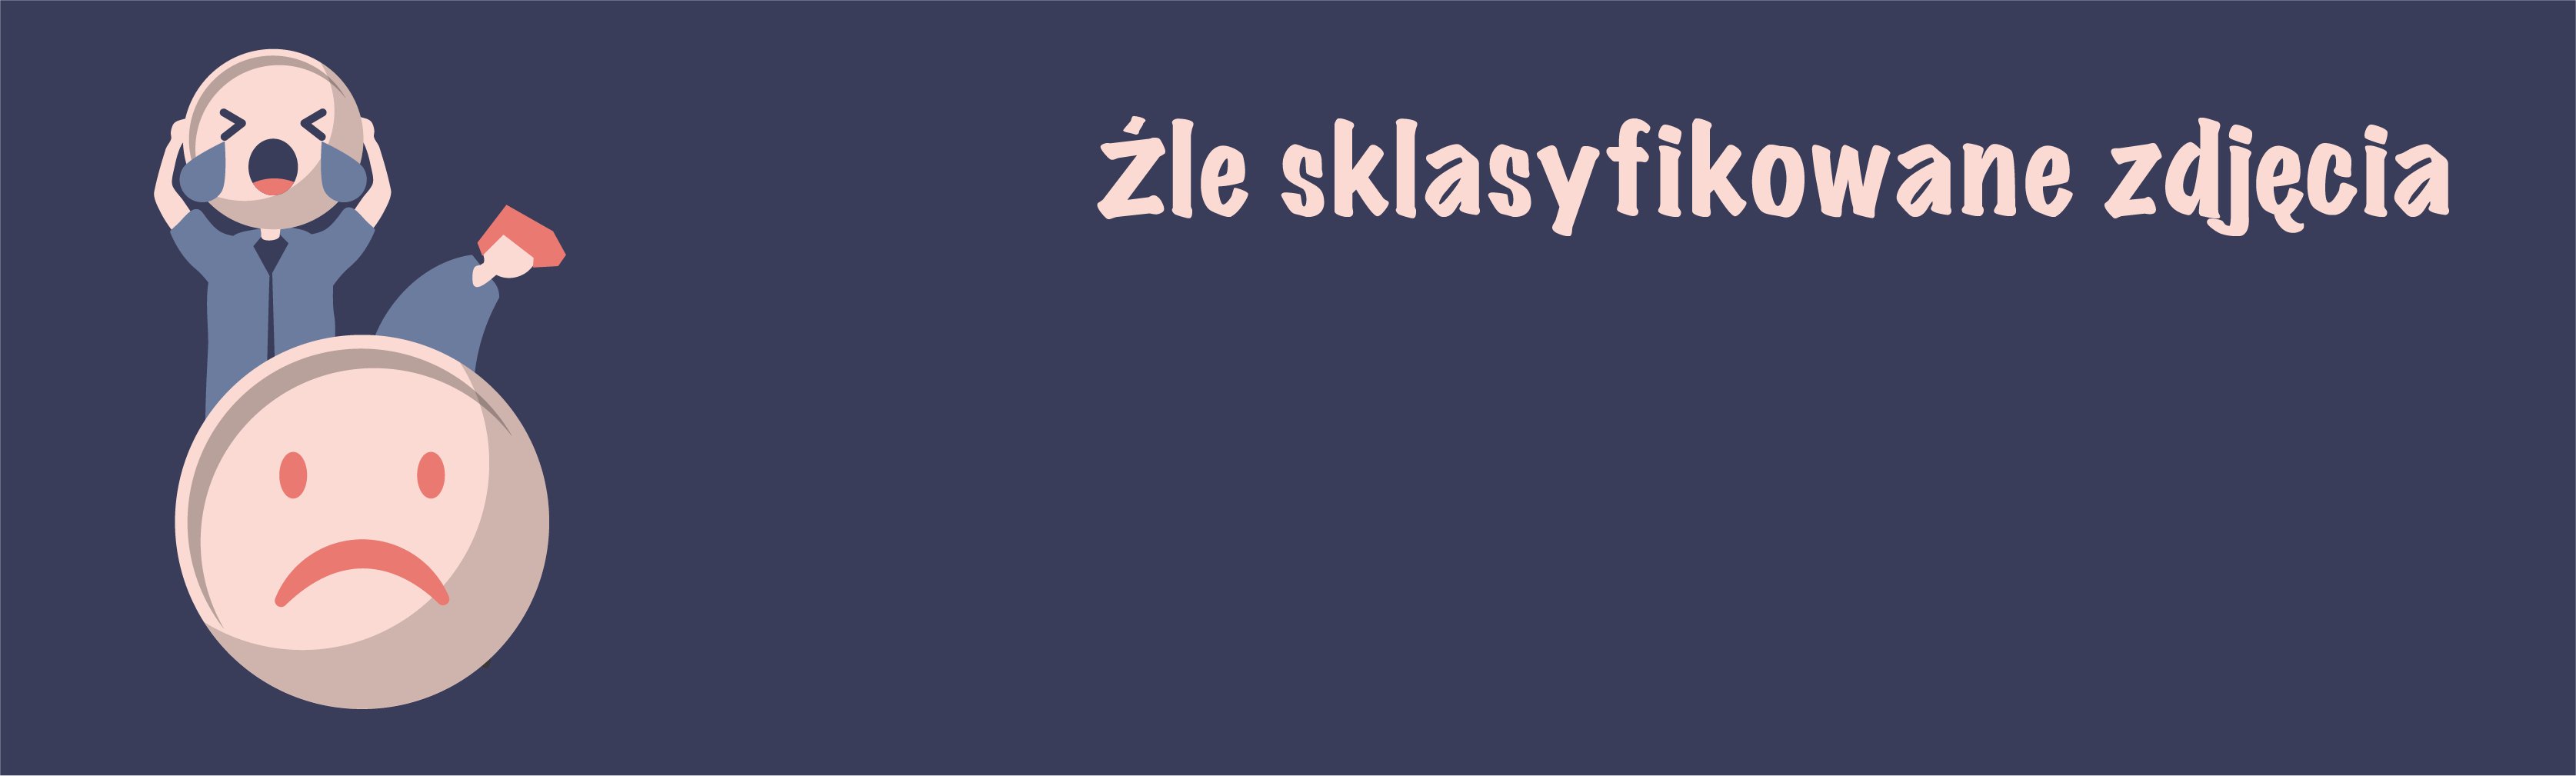

In [ ]:
print('przykłady źle sklasyfikowanych zdjęć: \n')

img_folder_path = '/content/drive/My Drive/projekt_DL/galaretka_set_3/sklepowe/'

foldery = ['Galaretka cytrynowa Delecta', 'Galaretka cytrynowa DrOetker', 'Galaretka wiśniowa Delecta', 'Galaretka wiśniowa DrOetker', 
           'Galaretka pomarańczowa Delecta', 'Galaretka pomarańczowa DrOetker', 'Galaretka truskawkowa Delecta', 'Galaretka truskawkowa DrOetker']

for folder in foldery:
  path = f'{img_folder_path}{folder}/'
  print(f'\n{folder} \n')
  for img in os.listdir(path):
      name = img
      img = (f'{path}{img}')  # pełna ścieżka do pliku
      img = cv.cvtColor(cv.imread(img), cv.COLOR_BGR2RGB)  # odczyt zdjęcia
      img = cv.resize(img, image_size)  # przeksalowania zdjecia do rozmaiarów (224, 224)
      test_image = image.img_to_array(img)  # zamiana zdjęcia na array
      test_image = np.expand_dims(test_image, axis=0)
      norm_image = test_image/255  # normalizacja zdjęcia - mega ważny krok
      test_pred = loaded_model.predict(norm_image)  # predykcja modelu
      pred = np.argmax(test_pred, axis=-1) # najlepsza labelka
      if labels[pred[0]] != folder:
          plt.imshow(np.squeeze(img))
          plt.title(f'Zdjęcie: {name[:-4]}, zostało sklasyfikowane przez model: {labels[pred[0]]}')
      plt.show()

Output hidden; open in https://colab.research.google.com to view.

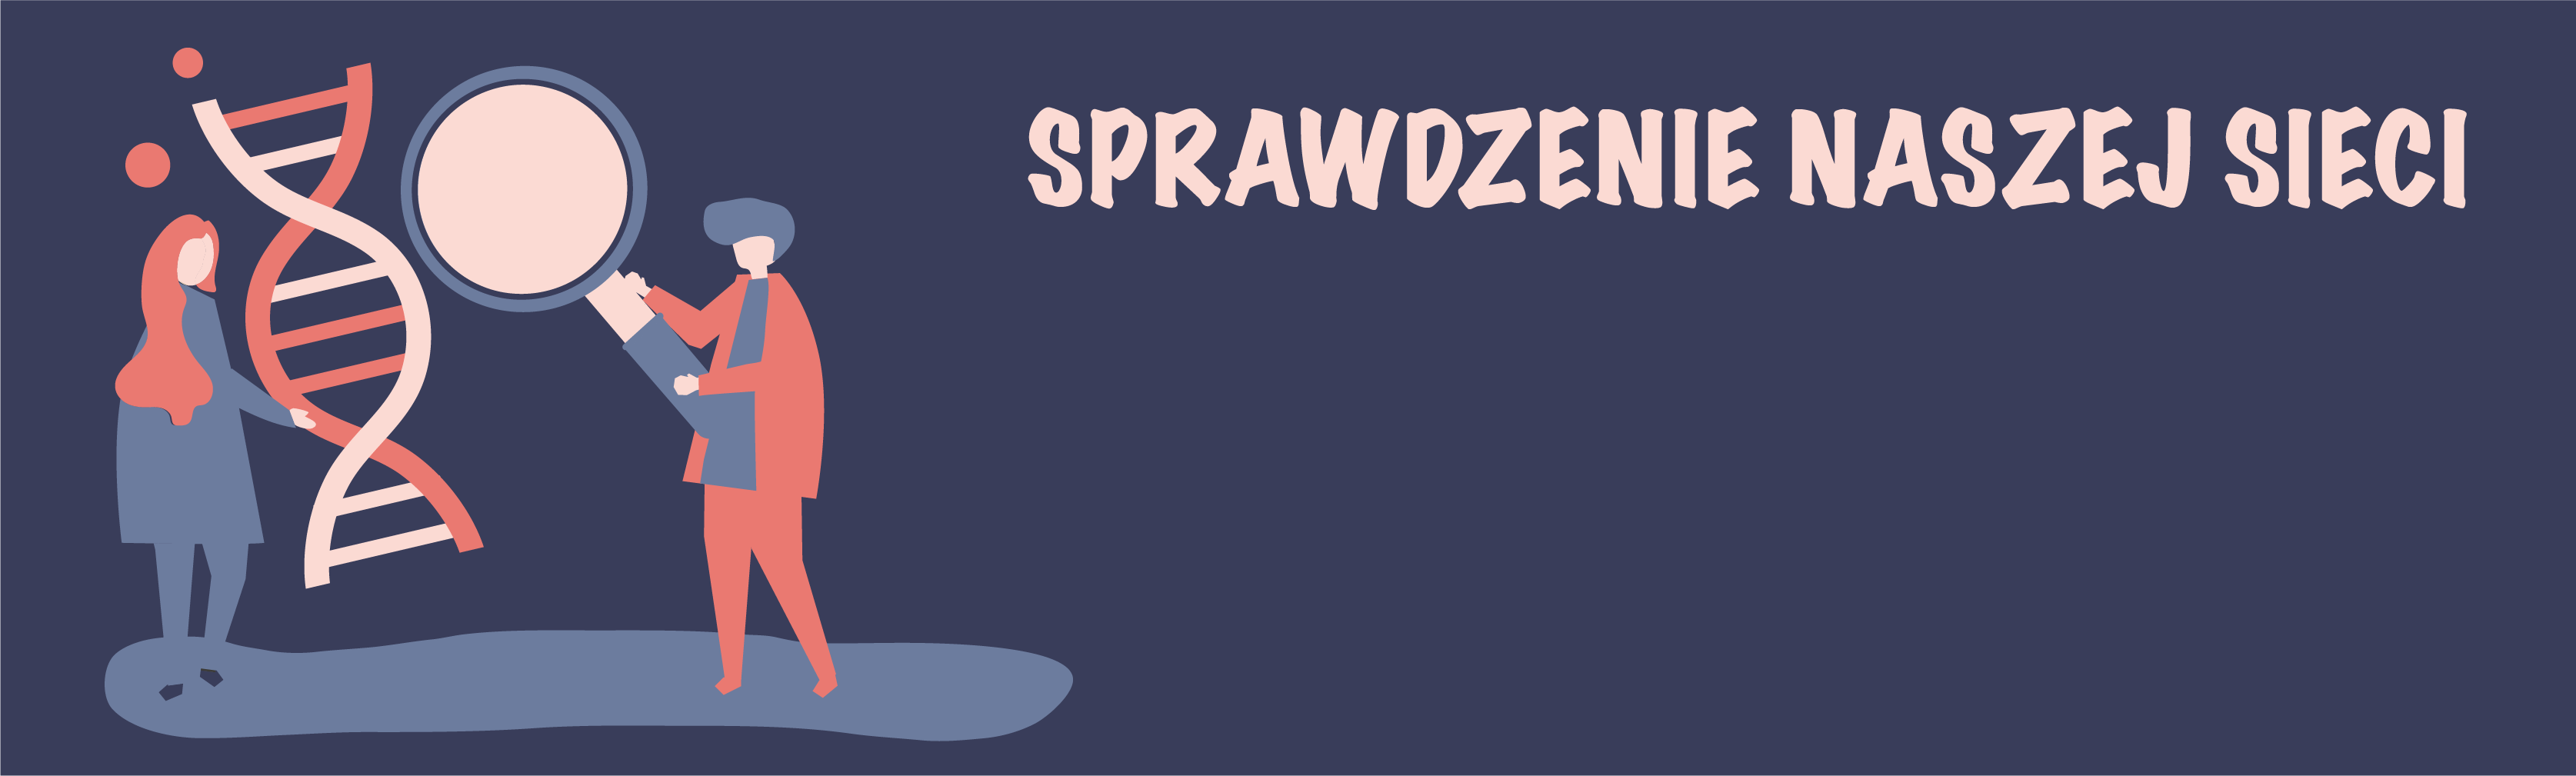

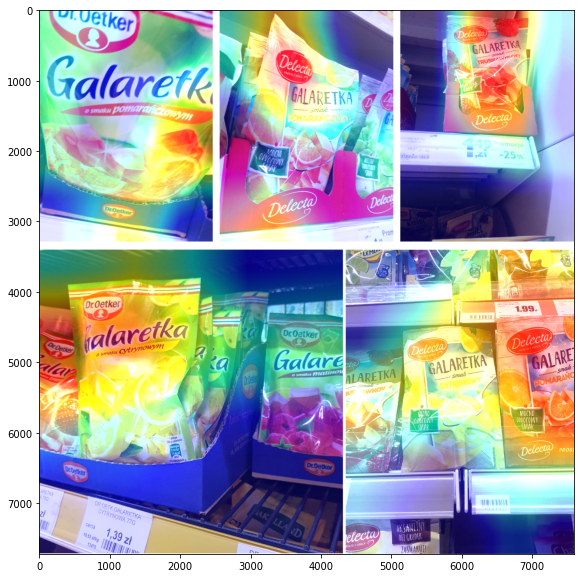

In [ ]:
img_path = str(r'/content/drive/My Drive/projekt_DL/colab notebooks/galaretki_heatmapy_przyklady/galaretki heatmapy.png')
img = cv2.imread(img_path, 0)
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.figure(figsize = (45,10))
plt.imshow(img)  # pokaż zdjęcie

# Co zapamiętuje sieć:
## - logo i wartości pikseli wkoło logo
## - charakterystyczny element z eykiety - owoc

# Najczęstszy błąd 
## - zbyt podobna kolorystyka piksali w obszarze wokół logo
## - ważne która galaretka wybija się "na pierwszy plan"
## - zmiana oświetlenia i załamania światła

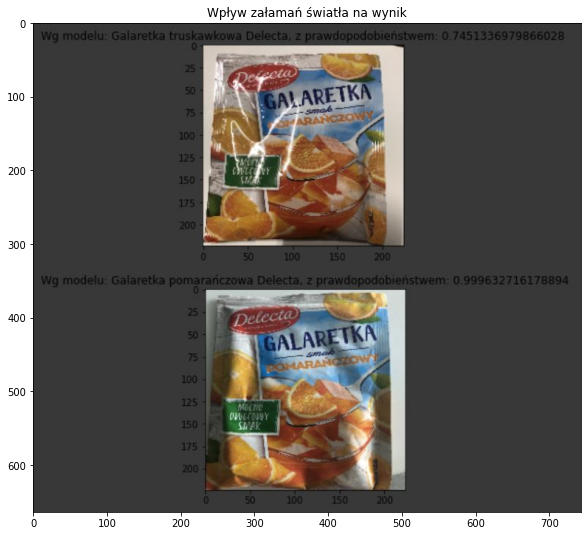

In [ ]:
img_path = str(r'/content/drive/My Drive/projekt_DL/colab notebooks/galaretka_pomar_blad.JPG')
img = cv2.imread(img_path, 0)
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.figure(figsize = (45,9))
plt.title('Wpływ załamań światła na wynik')
plt.imshow(img)

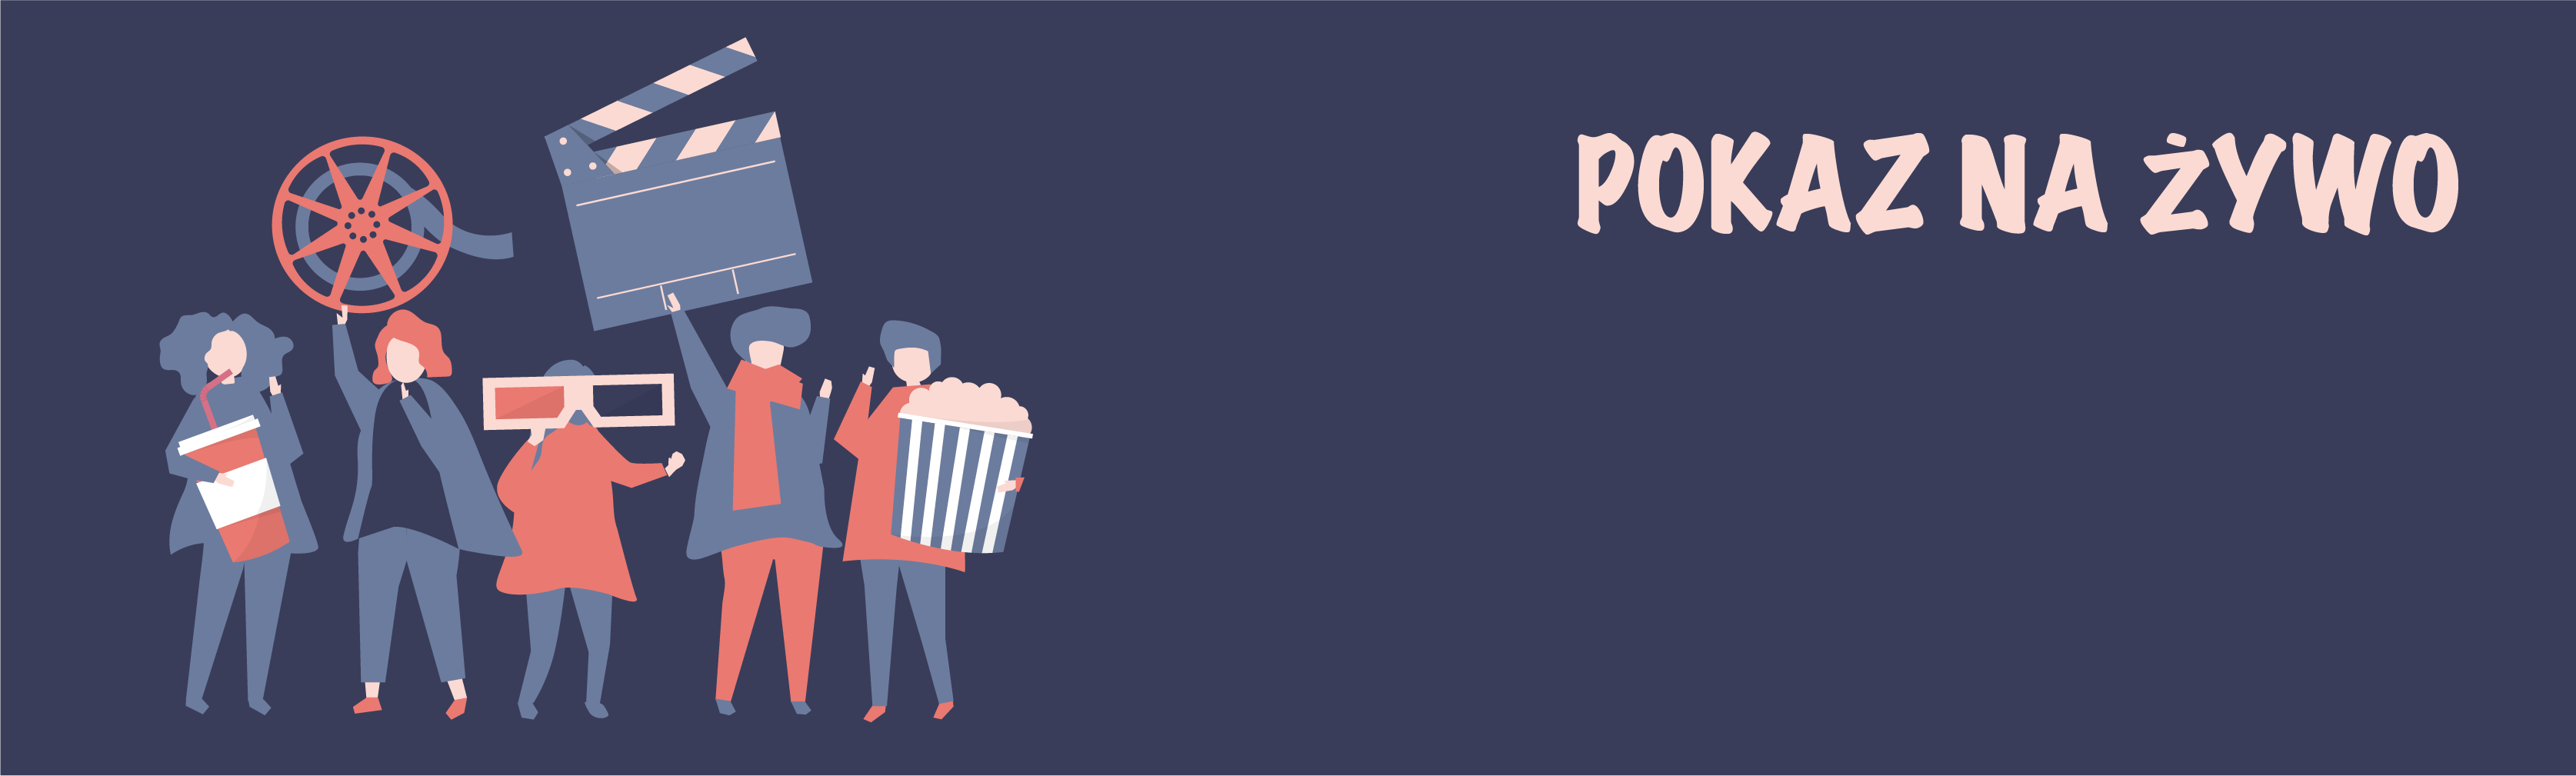

## Odczyt modelu z pliku

In [ ]:
model_save_name = 'model'
model_path = f"/content/drive/My Drive/projekt_DL/colab notebooks/{model_save_name}" 
# załadownie json i stworzenie modelu
json_file = open(f'{model_path}.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# załadowanie wag do modelu
loaded_model.load_weights(f"{model_path}.h5")
print(f"Model {model_save_name} pobrany z dysku google")

Model model pobrany z dysku google


## Przygotowanie zdjęć i labelek

In [ ]:
image_size = (224, 224)  # zależy od architektury
input_shape = (224, 224, 3)
batch_size = 32  # ten parametr zależy od samej architektury
seed = 21  # ziarno dla powtarzlaności wyników
lr = 0.001  # learning rate

test_path = str(f'/content/drive/My Drive/projekt_DL/galaretka_set_3/sklepowe')
test_datagen = ImageDataGenerator(rescale = 1/255) # skalowanie 1/255 to inaczej normalizacja, oznacza zmianę na unint(8)
test_set = test_datagen.flow_from_directory(test_path, target_size = image_size, batch_size = batch_size, shuffle = True, class_mode = 'categorical', seed=seed)

labels = []
for idx, key in enumerate(test_set.class_indices):
    labels.append(key)
    print(idx, key)

Galaretka = labels
DrOetker = []
Delecta = []
cytrynowa = []
truskawkowa = []
wiśniowa = []
pomarańczowa = []

for label in labels:
  if 'DrOetker' in label:
    DrOetker.append(label)
  elif 'Delecta' in label:
    Delecta.append(label)
  
  if 'cytrynowa' in label:
    cytrynowa.append(label)
  elif 'truskawkowa' in label:
    truskawkowa.append(label)
  elif 'pomarańczowa' in label:
    pomarańczowa.append(label)
  elif 'wiśniowa' in label:
    wiśniowa.append(label)

Found 1599 images belonging to 8 classes.
0 Galaretka cytrynowa Delecta
1 Galaretka cytrynowa DrOetker
2 Galaretka pomarańczowa Delecta
3 Galaretka pomarańczowa DrOetker
4 Galaretka truskawkowa Delecta
5 Galaretka truskawkowa DrOetker
6 Galaretka wiśniowa Delecta
7 Galaretka wiśniowa DrOetker


# Sprawdzenie modelu na testowych zdjęciach

In [ ]:
path = str(f'/content/drive/My Drive/projekt_DL/real/')
DrOetker_ile = 0
Delecta_ile = 0
cytrynowa_ile = 0
truskawkowa_ile = 0
wiśniowa_ile = 0
pomarańczowa_ile = 0
galaretka_ile = 0

for img in os.listdir(path):
  img = (f'{path}{img}')  # pełna ścieżka do pliku
  img = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)  # odczyt zdjęcia
  img = cv2.resize(img, image_size)  # przeksalowania zdjecia do rozmiarów (224, 224)
  plt.imshow(img)
  test_image = image.img_to_array(img)  # zamiana zdjęcia na array
  test_image = np.expand_dims(test_image, axis=0)
  norm_image = test_image/255  # normalizacja zdjęcia - mega ważny krok
  test_pred = loaded_model.predict(norm_image)  # predykcja modelu
  pred = np.argmax(test_pred, axis=-1) # najlepsza labelka
  plt.title(f'Wg modelu: {labels[pred[0]]}, z prawdopodobieństwem: {test_pred[0][pred[0]]}')
  plt.show()

  if labels[pred[0]] in Galaretka:
    galaretka_ile += 1

  if labels[pred[0]] in DrOetker:
    DrOetker_ile += 1
  elif labels[pred[0]] in Delecta:
    Delecta_ile += 1

  if labels[pred[0]] in cytrynowa:
    cytrynowa_ile += 1
  elif labels[pred[0]] in truskawkowa:
    truskawkowa_ile += 1
  elif labels[pred[0]] in wiśniowa:
    wiśniowa_ile += 1
  elif labels[pred[0]] in pomarańczowa:
    pomarańczowa_ile += 1

print('\nPodsumowanie: \n')
print(f'Galaretek rozpoznano: {galaretka_ile}')
print(f'Ilość zdjęć wg producentów: Delecta: {Delecta_ile}, DrOetker: {DrOetker_ile}')
print(f'Ilość zdjęć wg smaków: cytryna: {cytrynowa_ile}, truskawka: {truskawkowa_ile}, wiśnia: {wiśniowa_ile}, pomrańcz: {pomarańczowa_ile}')

Output hidden; open in https://colab.research.google.com to view.

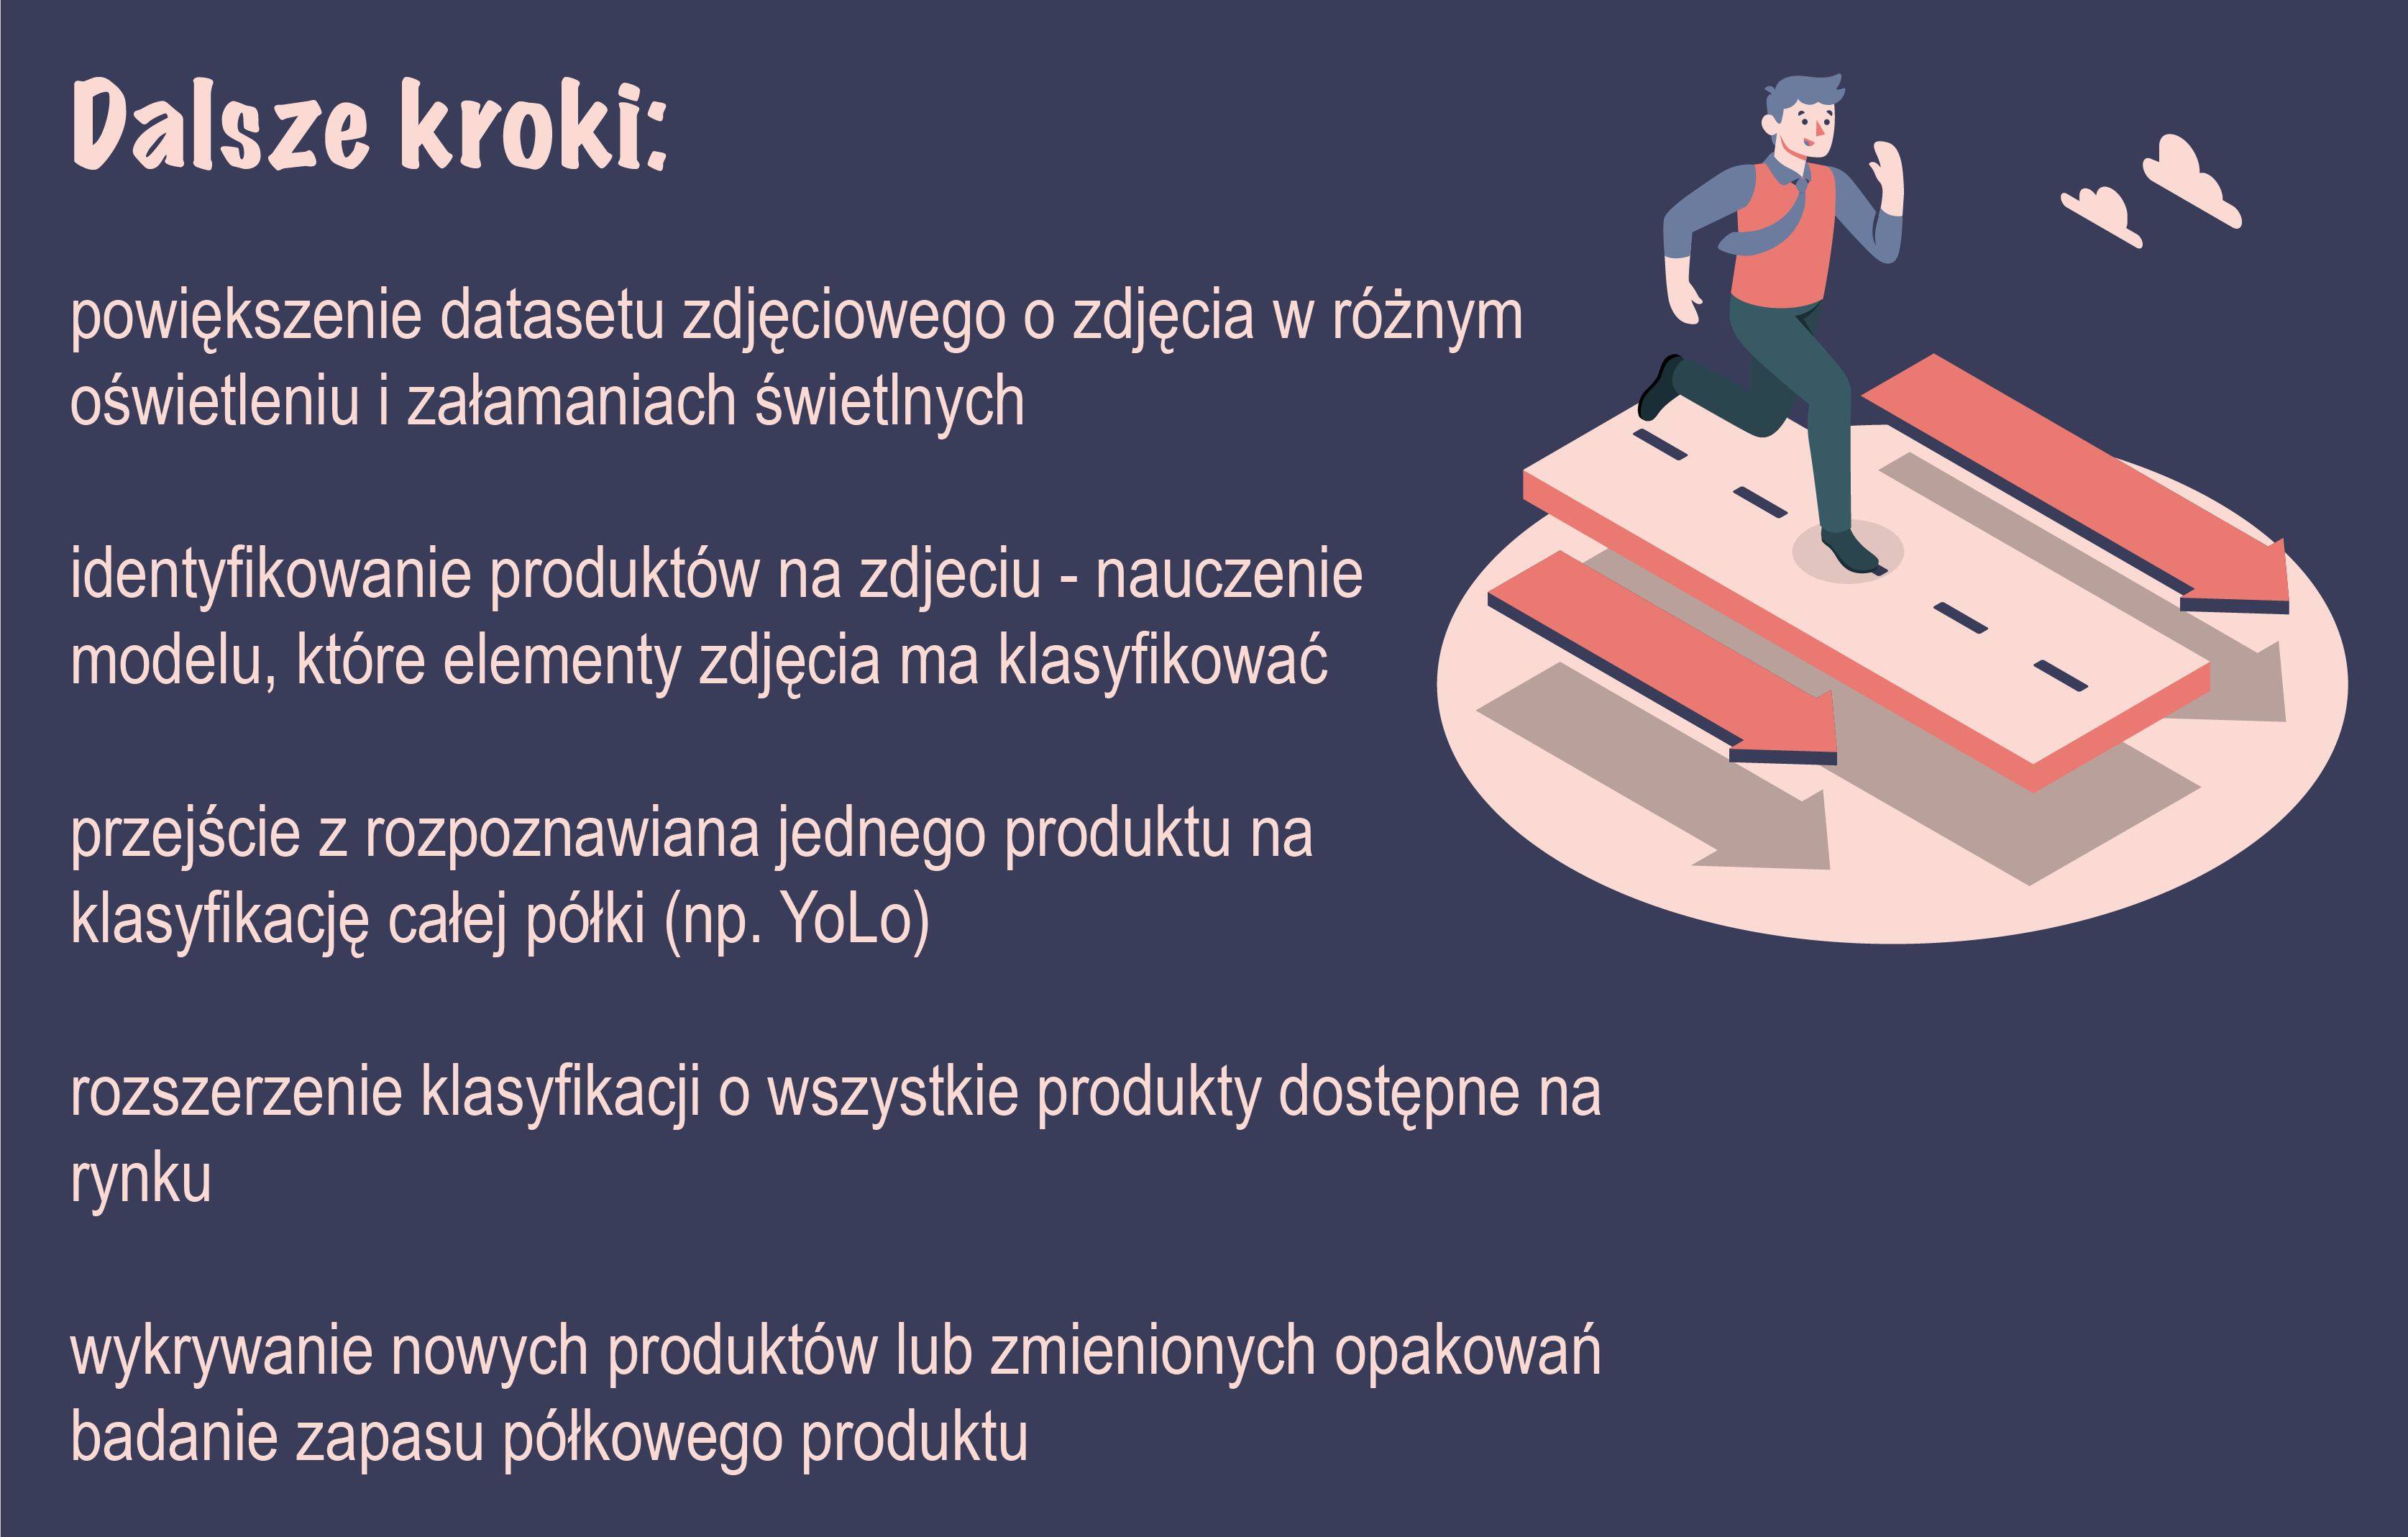